In [45]:
from prophet import Prophet
import pandas as pd
data = pd.read_excel("Kolkata_AQI_Data.xlsx")

In [46]:
print(data.columns)
updated_data = data[['Date', 'o3_Min']]
updated_data.tail()
updated_data[['ds', 'y']]=updated_data[['Date', 'o3_Min']]
updated_data = updated_data[['ds', 'y']]
updated_data.tail()

Index(['Date', 'Unnamed: 1', 'Time', 'o3_Min', 'o3_Max', 'o3_Avg', 'no2_Min',
       'no2_Max', 'no2_Avg', 'so2_Min', 'so2_Max', 'so2_Avg', 'co_Min',
       'co_Max', 'co_Avg', 'pm1_Min', 'pm1_Max', 'pm1_Avg', 'pm25_Min',
       'pm25_Max', 'pm25_Avg', 'pm10_Min', 'pm10_Max', 'pm10_Avg', 'nh3_Min',
       'nh3_Max', 'nh3_Avg'],
      dtype='object')


/tmp/ipykernel_5437/3720905084.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_5437/3720905084.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ds      y
1557 2024-04-08  18.60
1558 2024-04-09   4.36
1559 2024-04-10   5.24
1560 2024-04-11   7.02
1561 2024-04-12  12.88

In [47]:

m = Prophet()
m.fit(updated_data)
future = m.make_future_dataframe(periods=100)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



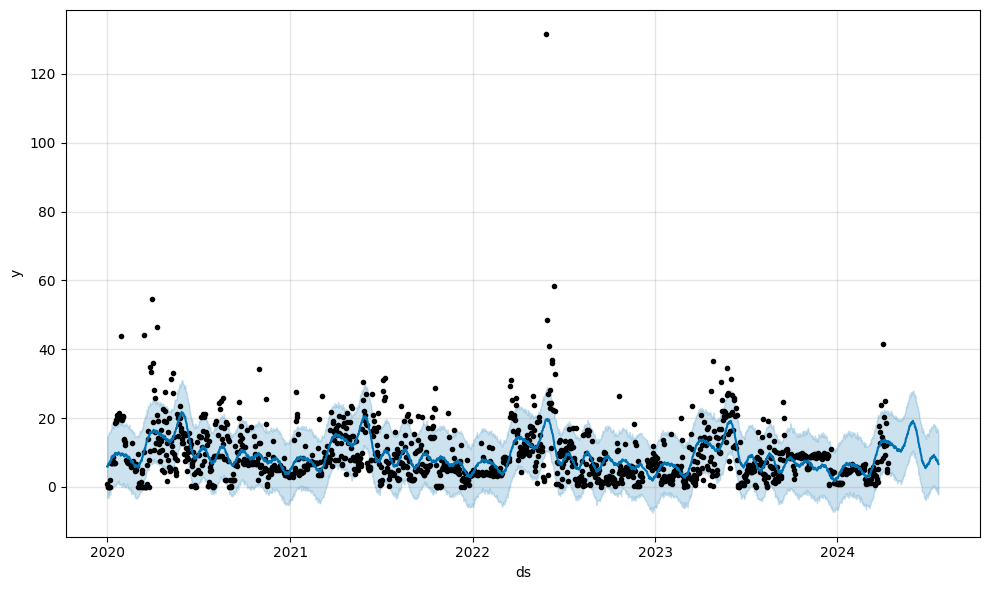

In [50]:
# Python
fig1 = m.plot(forecast)

/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior,

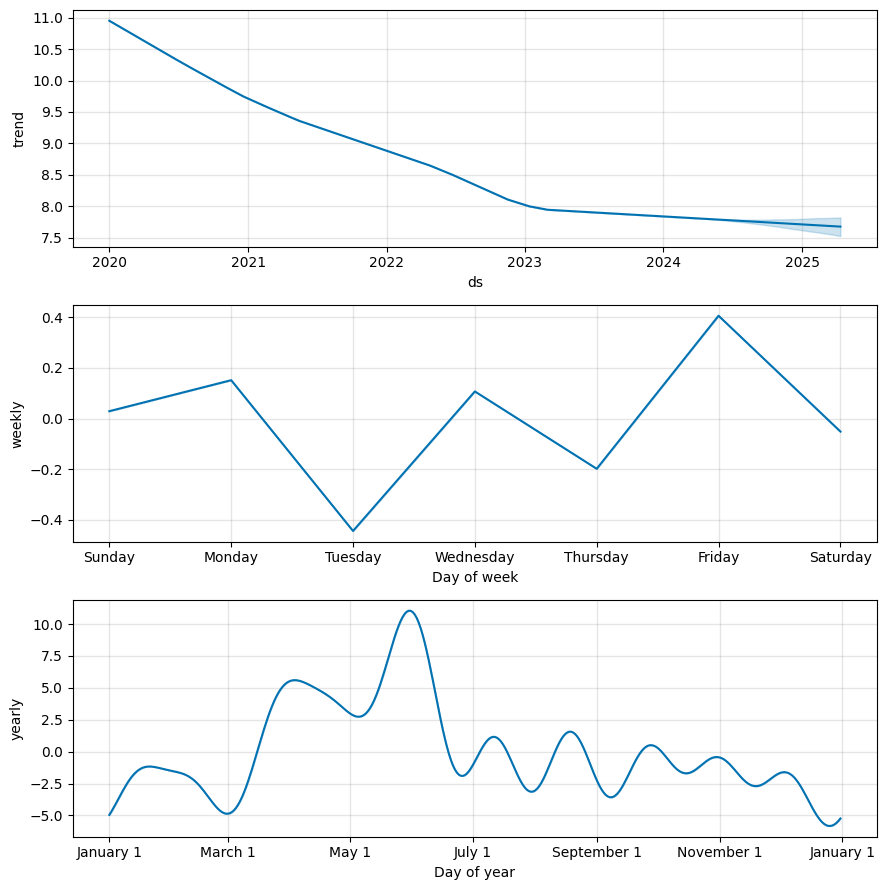

In [25]:
# Python
fig2 = m.plot_components(forecast)

In [26]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [27]:
# Python
plot_components_plotly(m, forecast)

/home/aee/.local/lib/python3.10/site-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [29]:
forecast.tail()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
1873 2025-04-08  7.679954    3.568791   22.010268     7.533201     7.822384   
1874 2025-04-09  7.679607    3.974621   21.770046     7.532427     7.823490   
1875 2025-04-10  7.679261    3.980370   21.257561     7.531669     7.823723   
1876 2025-04-11  7.678914    4.407415   21.988430     7.530516     7.823806   
1877 2025-04-12  7.678567    3.688479   21.983813     7.529972     7.823841   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
1873        4.981506              4.981506              4.981506 -0.444113   
1874        5.463307              5.463307              5.463307  0.107114   
1875        5.082640              5.082640              5.082640 -0.198458   
1876        5.608035              5.608035              5.608035  0.406092   
1877        5.068592              5.068592              5.068592 -0.051297   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
1873     -0.444113     -0.444113  5.425619      5.425619      5.425619   
1874      0.107114      0.107114  5.356192      5.356192      5.356192   
1875     -0.198458     -0.198458  5.281098      5.281098      5.281098   
1876      0.406092      0.406092  5.201943      5.201943      5.201943   
1877     -0.051297     -0.051297  5.119889      5.119889      5.119889   

      multiplicative_terms  multiplicative_terms_lower  \
1873                   0.0                         0.0   
1874                   0.0                         0.0   
1875                   0.0                         0.0   
1876                   0.0                         0.0   
1877                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
1873                         0.0  12.661460  
1874                         0.0  13.142914  
1875                         0.0  12.761900  
1876                         0.0  13.286949  
1877                         0.0  12.747159

#### Prophet

/tmp/ipykernel_5687/2335027743.py:18: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data = data.interpolate()
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retai

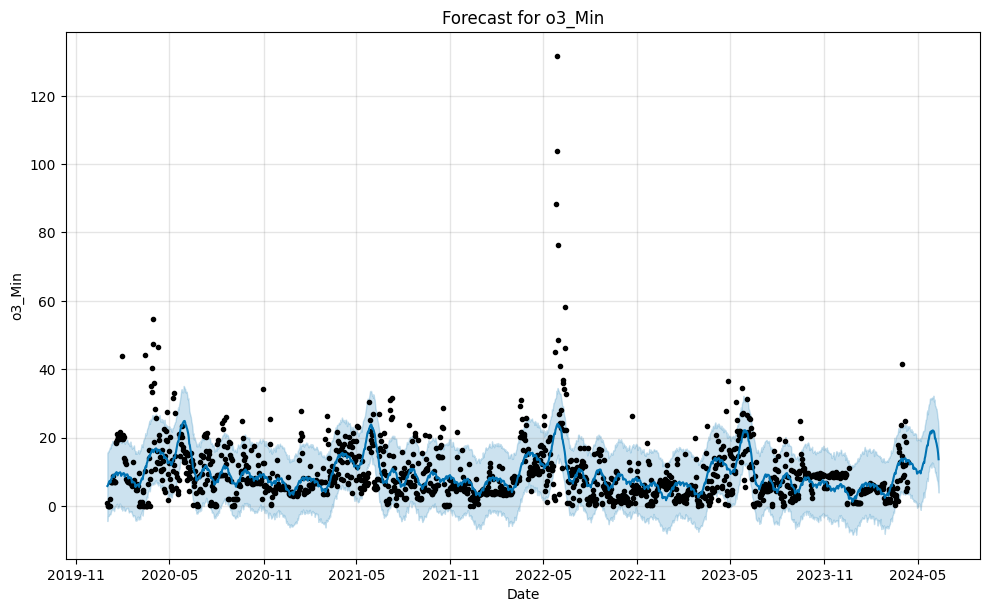

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1




Prediction of o3_Min is 
       yhat_lower  yhat_upper       yhat
1617    8.408496   28.405352  18.326886
1618    7.595897   27.124014  17.503901
1619    7.157770   25.886191  16.698577
1620    5.844400   24.871827  15.487875
1621    3.937793   22.658529  13.676602
<class 'pandas.core.frame.DataFrame'>
value is [[ 8.40849603 28.40535249 18.32688594]
 [ 7.5958967  27.12401441 17.5039013 ]
 [ 7.15776969 25.88619073 16.69857715]
 [ 5.84439986 24.87182718 15.48787489]
 [ 3.93779281 22.65852894 13.67660155]]


INFO:cmdstanpy:finish chain 1
/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


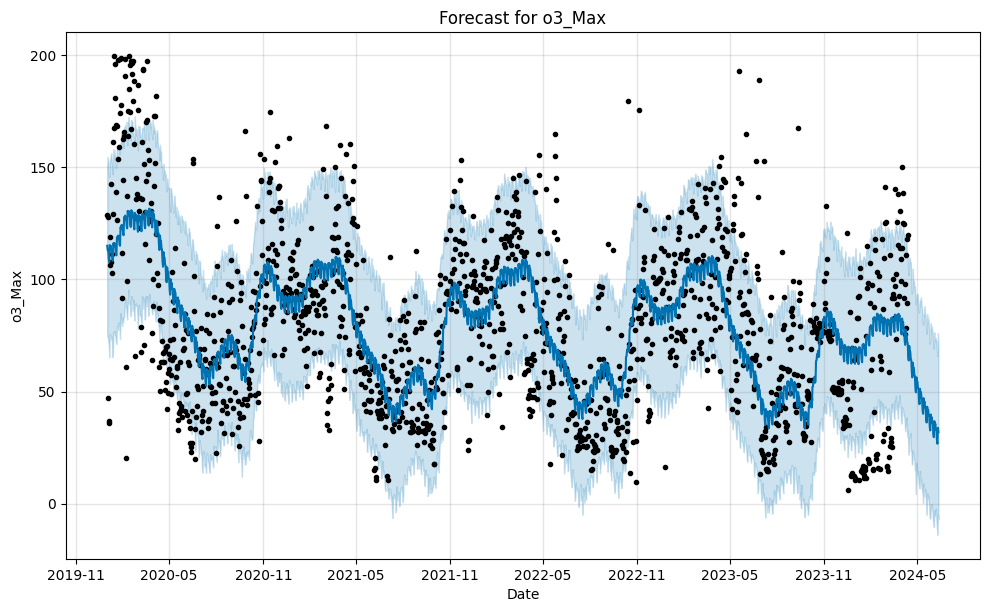

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1




Prediction of o3_Max is 
       yhat_lower  yhat_upper       yhat
1617   -7.087162   72.634914  33.152148
1618  -10.714224   68.626032  28.374685
1619  -13.918496   65.926796  26.706175
1620   -5.062148   76.079199  33.796968
1621   -7.002427   71.289291  31.926796
<class 'pandas.core.frame.DataFrame'>
value is [[ -7.08716162  72.63491392  33.15214811]
 [-10.71422429  68.62603192  28.37468514]
 [-13.91849555  65.92679618  26.70617511]
 [ -5.06214833  76.07919863  33.79696786]
 [ -7.0024275   71.28929074  31.92679597]]


/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


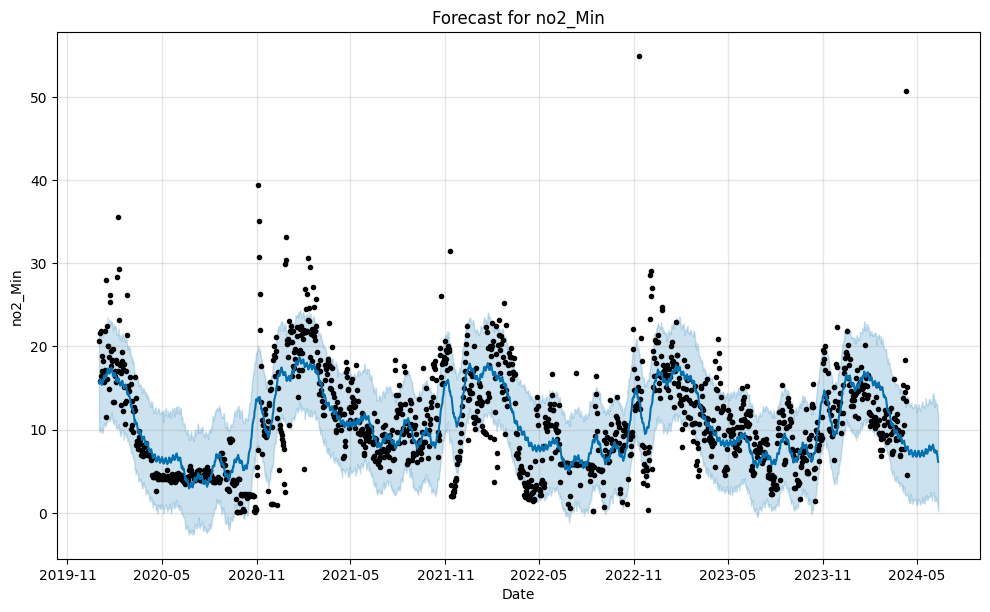

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1




Prediction of no2_Min is 
       yhat_lower  yhat_upper      yhat
1617    1.566340   13.083266  7.364879
1618    1.657347   13.194014  7.449782
1619    1.050829   12.859665  7.017255
1620    0.741668   12.248678  6.656660
1621    0.191212   11.830511  6.121002
<class 'pandas.core.frame.DataFrame'>
value is [[ 1.56633993 13.08326589  7.36487945]
 [ 1.65734684 13.19401372  7.44978154]
 [ 1.05082919 12.85966482  7.01725497]
 [ 0.74166773 12.24867818  6.65665985]
 [ 0.19121224 11.8305114   6.12100167]]


/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


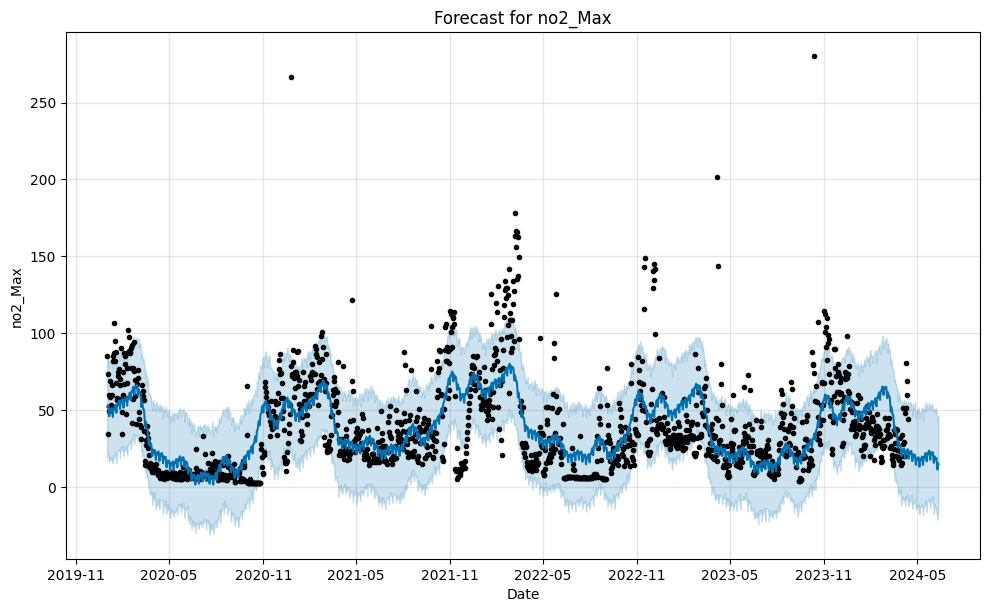

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1




Prediction of no2_Max is 
       yhat_lower  yhat_upper       yhat
1617  -16.702627   49.059499  18.844517
1618  -17.065825   47.317243  15.350286
1619  -21.242113   42.218405  11.441856
1620  -17.043895   46.338972  15.583506
1621  -16.151092   45.675364  14.839760
<class 'pandas.core.frame.DataFrame'>
value is [[-16.70262726  49.0594992   18.84451676]
 [-17.06582493  47.31724321  15.35028578]
 [-21.24211326  42.21840514  11.44185591]
 [-17.04389493  46.33897151  15.58350569]
 [-16.15109213  45.67536371  14.83976043]]


/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


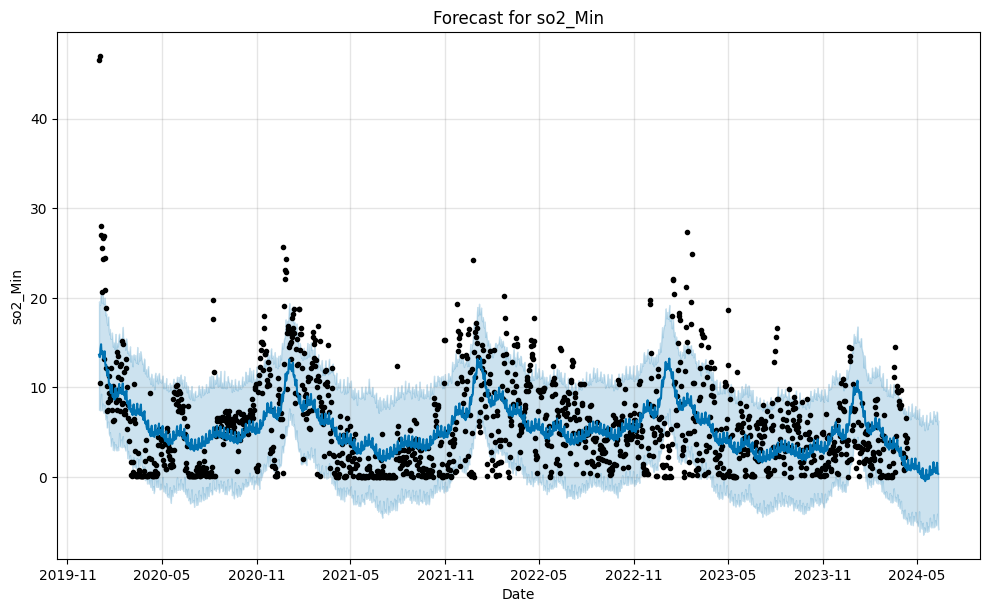

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1




Prediction of so2_Min is 
       yhat_lower  yhat_upper      yhat
1617   -5.424418    6.494276  0.391058
1618   -4.767411    7.285574  1.174625
1619   -4.125164    7.188770  1.565352
1620   -5.302809    5.819983  0.407247
1621   -5.893526    6.278520  0.320746
<class 'pandas.core.frame.DataFrame'>
value is [[-5.42441837  6.49427563  0.39105789]
 [-4.76741146  7.28557402  1.17462497]
 [-4.12516422  7.1887699   1.56535242]
 [-5.30280895  5.81998327  0.40724745]
 [-5.89352605  6.27851971  0.32074593]]


/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


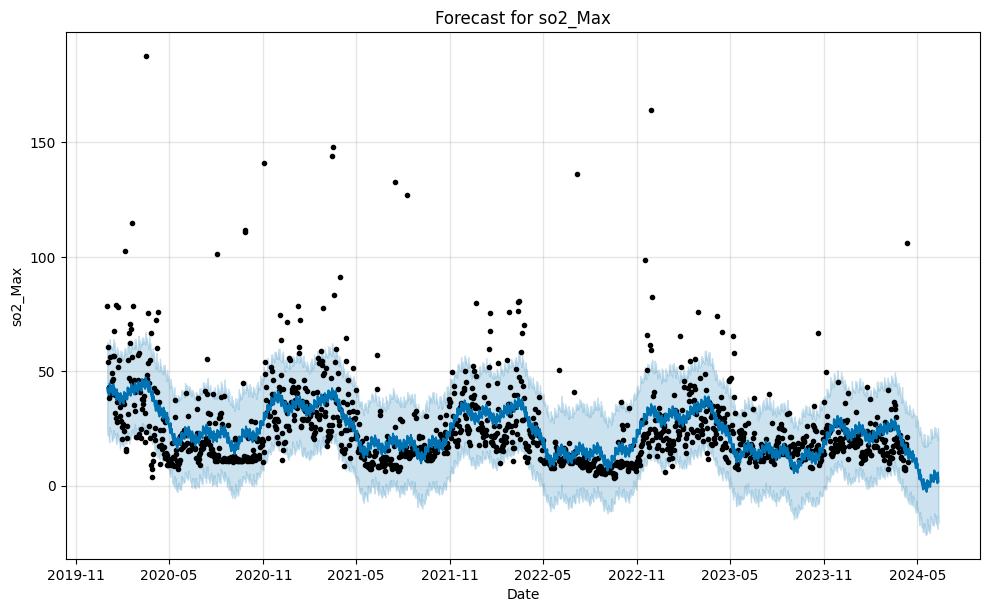

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1




Prediction of so2_Max is 
       yhat_lower  yhat_upper      yhat
1617  -16.980087   21.568794  2.641403
1618  -16.545476   23.171150  2.292840
1619  -18.922817   19.953816  1.030419
1620  -13.097877   25.182735  5.697993
1621  -16.381714   20.813863  1.743342
<class 'pandas.core.frame.DataFrame'>
value is [[-16.98008674  21.56879381   2.6414034 ]
 [-16.54547605  23.17115043   2.29283964]
 [-18.92281687  19.95381558   1.0304195 ]
 [-13.097877    25.18273546   5.69799334]
 [-16.38171384  20.81386261   1.74334162]]


/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


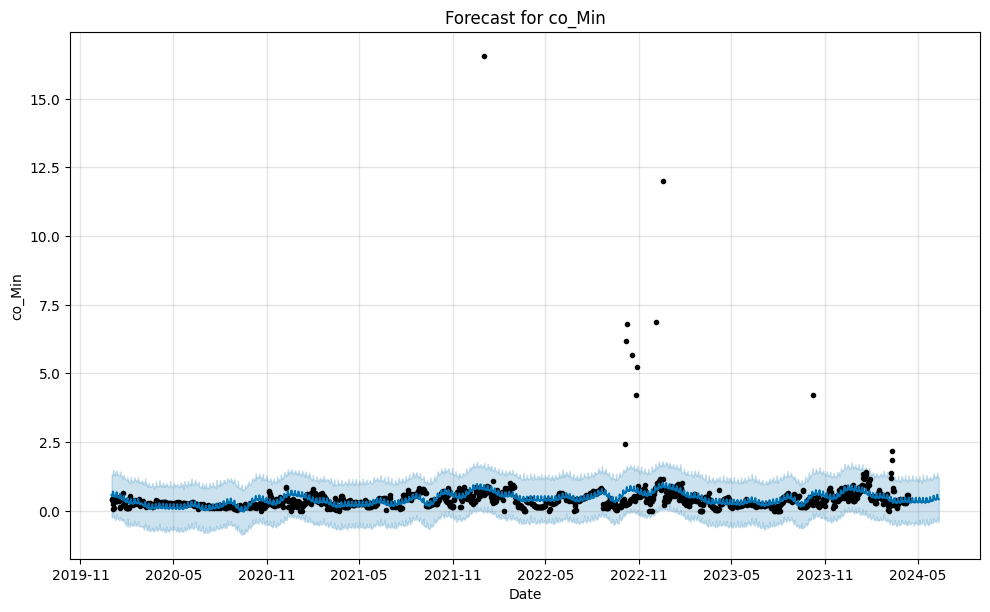

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1




Prediction of co_Min is 
       yhat_lower  yhat_upper      yhat
1617   -0.337720    1.264786  0.448130
1618   -0.248256    1.385403  0.580553
1619   -0.322861    1.212343  0.453662
1620   -0.392594    1.250766  0.433898
1621   -0.399576    1.184865  0.417737
<class 'pandas.core.frame.DataFrame'>
value is [[-0.3377203   1.26478584  0.44813037]
 [-0.24825609  1.38540341  0.58055305]
 [-0.32286053  1.21234317  0.45366168]
 [-0.39259391  1.25076563  0.43389826]
 [-0.39957632  1.18486535  0.41773716]]


/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


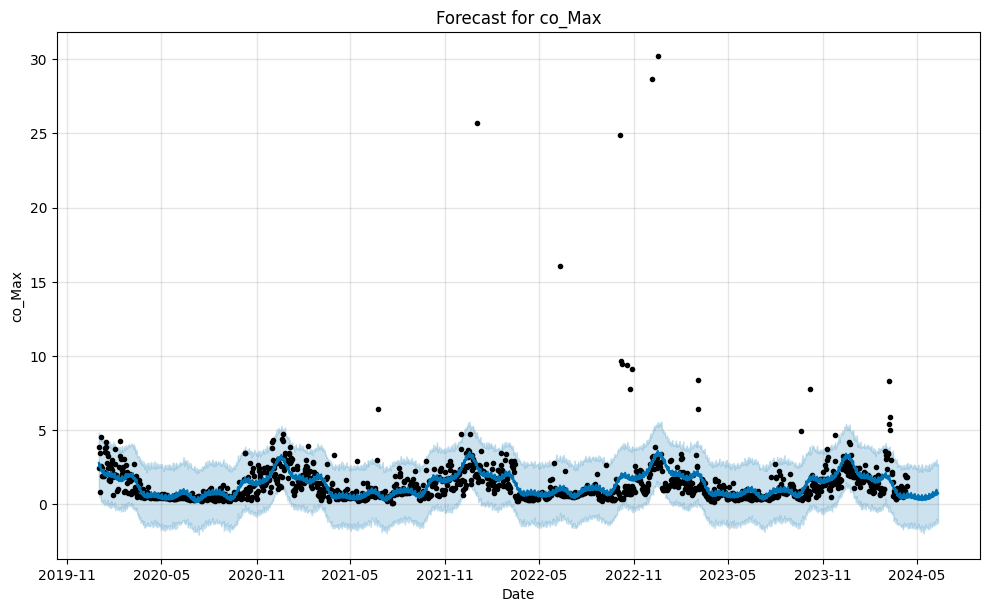

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1




Prediction of co_Max is 
       yhat_lower  yhat_upper      yhat
1617   -1.044397    2.784027  0.810355
1618   -0.980193    3.013256  0.974553
1619   -1.239087    2.558208  0.641006
1620   -1.314559    2.736728  0.809740
1621   -1.131540    2.714772  0.724918
<class 'pandas.core.frame.DataFrame'>
value is [[-1.04439663  2.7840271   0.81035536]
 [-0.9801934   3.01325621  0.97455312]
 [-1.23908659  2.55820817  0.64100607]
 [-1.31455898  2.73672832  0.80973994]
 [-1.13153972  2.71477174  0.72491817]]


/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


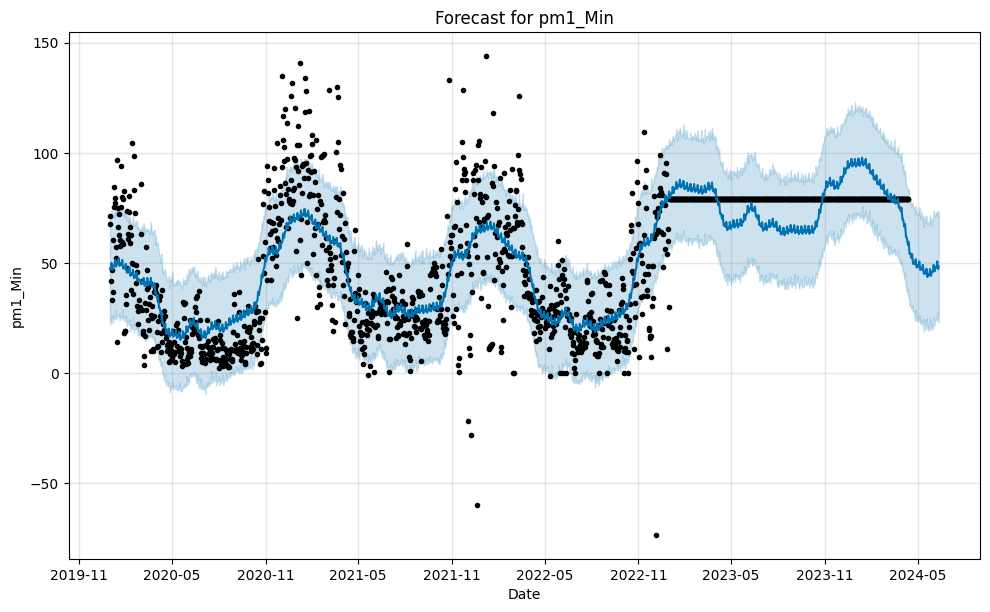

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1




Prediction of pm1_Min is 
       yhat_lower  yhat_upper       yhat
1617   23.742292   71.308898  48.070010
1618   27.475991   73.010114  50.679384
1619   25.394203   73.550030  48.691252
1620   23.693509   72.693414  47.190213
1621   23.010540   73.045519  48.275142
<class 'pandas.core.frame.DataFrame'>
value is [[23.74229181 71.30889836 48.07001049]
 [27.47599064 73.01011387 50.67938378]
 [25.39420345 73.55002951 48.69125232]
 [23.69350922 72.69341436 47.19021313]
 [23.01054009 73.04551896 48.2751425 ]]


/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


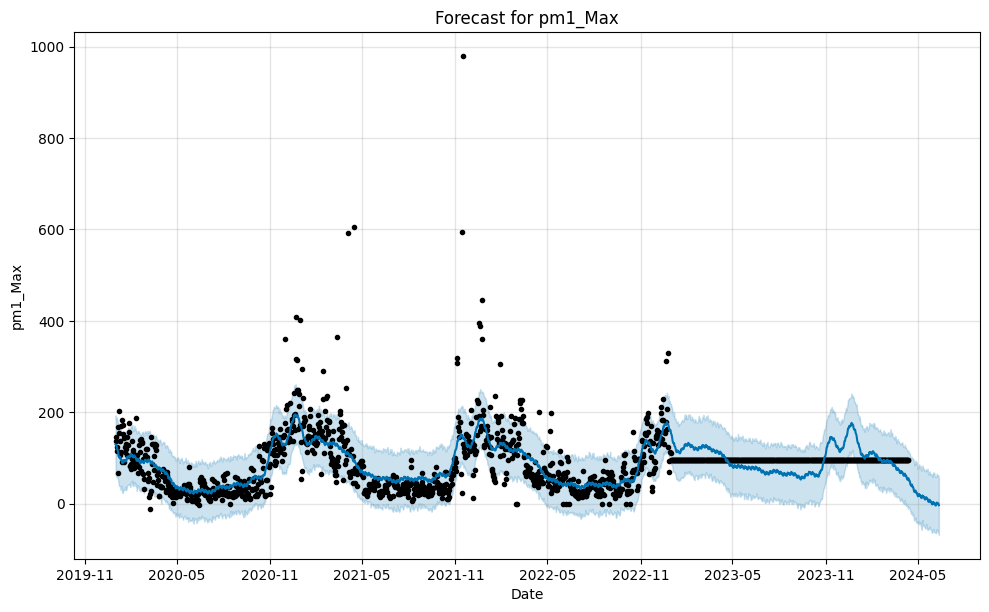

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1




Prediction of pm1_Max is 
       yhat_lower  yhat_upper      yhat
1617  -55.488788   65.763750  2.443711
1618  -60.195491   62.228188 -0.896301
1619  -61.656010   60.513082  1.138631
1620  -62.609669   62.465805  0.488181
1621  -68.077518   56.519156 -3.376106
<class 'pandas.core.frame.DataFrame'>
value is [[-55.48878827  65.76374963   2.44371149]
 [-60.19549143  62.22818796  -0.89630086]
 [-61.65601019  60.51308158   1.13863118]
 [-62.60966876  62.46580513   0.48818083]
 [-68.07751848  56.51915614  -3.37610599]]


/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


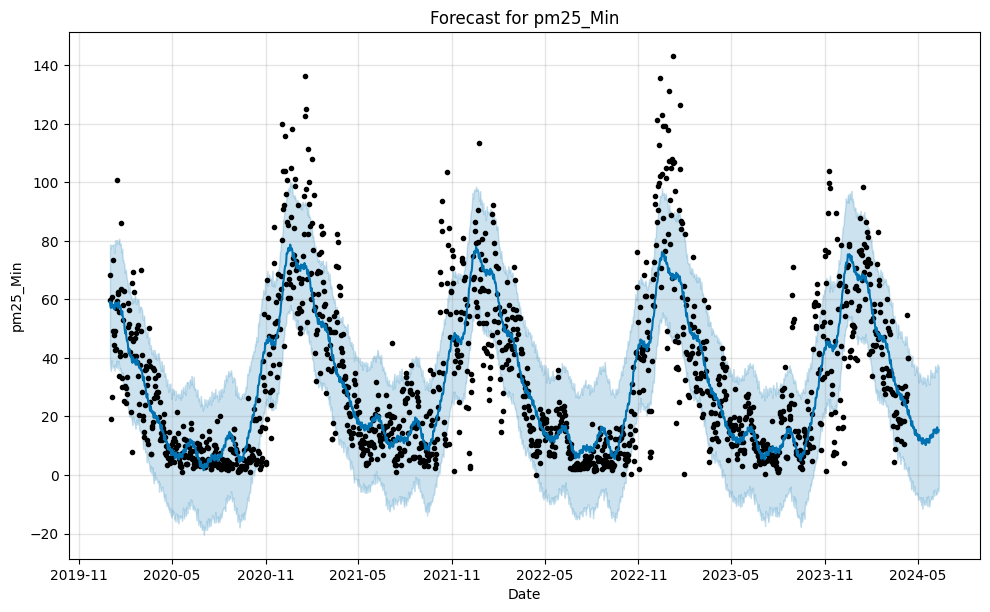

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1




Prediction of pm25_Min is 
       yhat_lower  yhat_upper       yhat
1617   -6.527644   35.213154  14.234724
1618   -5.189532   36.627128  16.308705
1619   -4.488718   37.855930  15.217727
1620   -5.634201   36.645209  14.616730
1621   -4.311282   37.104173  15.344286
<class 'pandas.core.frame.DataFrame'>
value is [[-6.52764405 35.21315419 14.23472431]
 [-5.18953159 36.62712811 16.30870516]
 [-4.48871765 37.85592956 15.21772741]
 [-5.63420082 36.64520944 14.61673042]
 [-4.31128245 37.10417309 15.34428641]]


/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


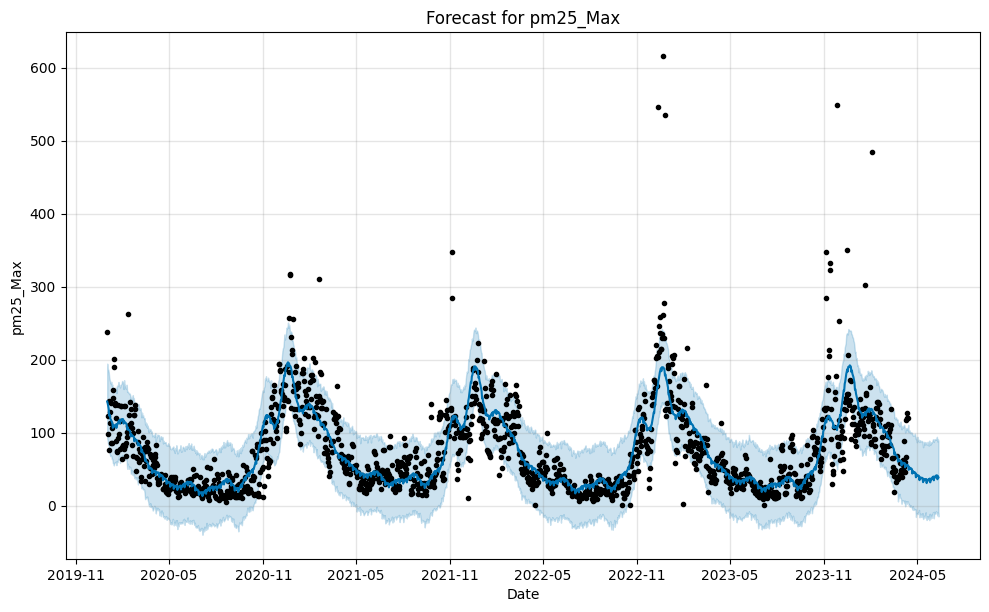

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1




Prediction of pm25_Max is 
       yhat_lower  yhat_upper       yhat
1617   -8.416526   90.788760  40.973642
1618   -9.773271   94.124522  41.479353
1619  -13.834632   87.556870  35.952554
1620   -9.679299   91.047260  40.377243
1621  -15.007237   88.522034  38.449617
<class 'pandas.core.frame.DataFrame'>
value is [[ -8.41652612  90.78876046  40.97364204]
 [ -9.77327093  94.12452169  41.47935295]
 [-13.83463152  87.55687047  35.95255441]
 [ -9.67929922  91.04726041  40.37724298]
 [-15.00723729  88.52203357  38.4496167 ]]


/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


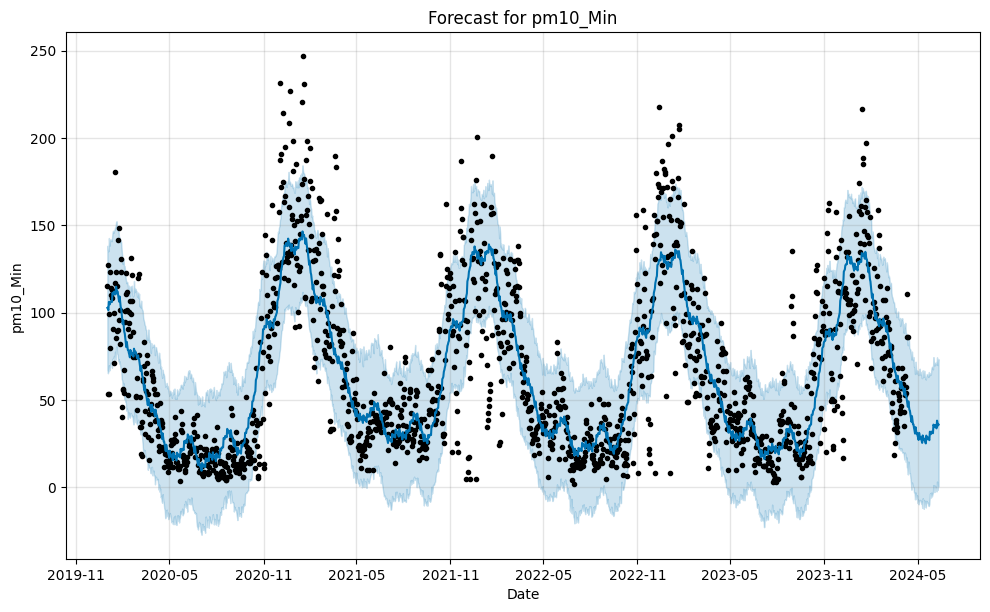

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1




Prediction of pm10_Min is 
       yhat_lower  yhat_upper       yhat
1617   -2.353836   70.798219  33.779192
1618    3.368210   74.435395  38.192107
1619   -1.430833   70.014105  36.775980
1620    0.653074   73.147009  35.407982
1621    0.690262   73.387547  35.949471
<class 'pandas.core.frame.DataFrame'>
value is [[-2.35383626 70.7982194  33.77919209]
 [ 3.36821014 74.43539541 38.19210695]
 [-1.43083255 70.01410456 36.77597993]
 [ 0.65307441 73.14700902 35.40798189]
 [ 0.69026238 73.38754726 35.94947105]]


/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


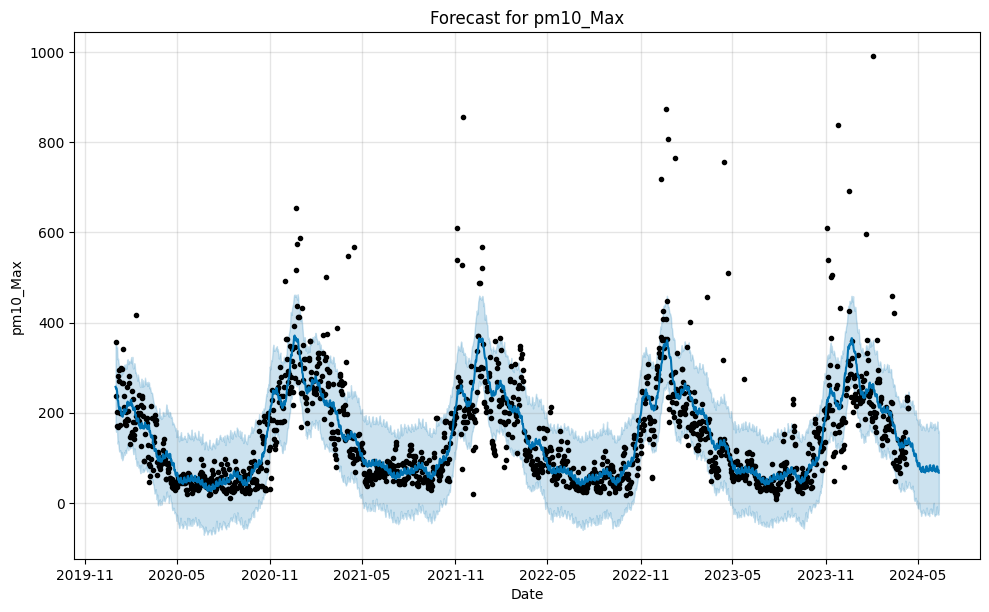

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1




Prediction of pm10_Max is 
       yhat_lower  yhat_upper       yhat
1617   -8.011952  167.525131  80.424315
1618  -23.664794  180.528695  80.650964
1619  -23.012613  166.179587  68.823455
1620  -26.597902  155.764316  73.175115
1621  -15.417967  159.697118  66.822085
<class 'pandas.core.frame.DataFrame'>
value is [[ -8.01195201 167.52513093  80.42431497]
 [-23.66479431 180.52869547  80.65096365]
 [-23.01261258 166.17958674  68.82345521]
 [-26.59790235 155.76431578  73.17511452]
 [-15.41796659 159.69711767  66.82208474]]


/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


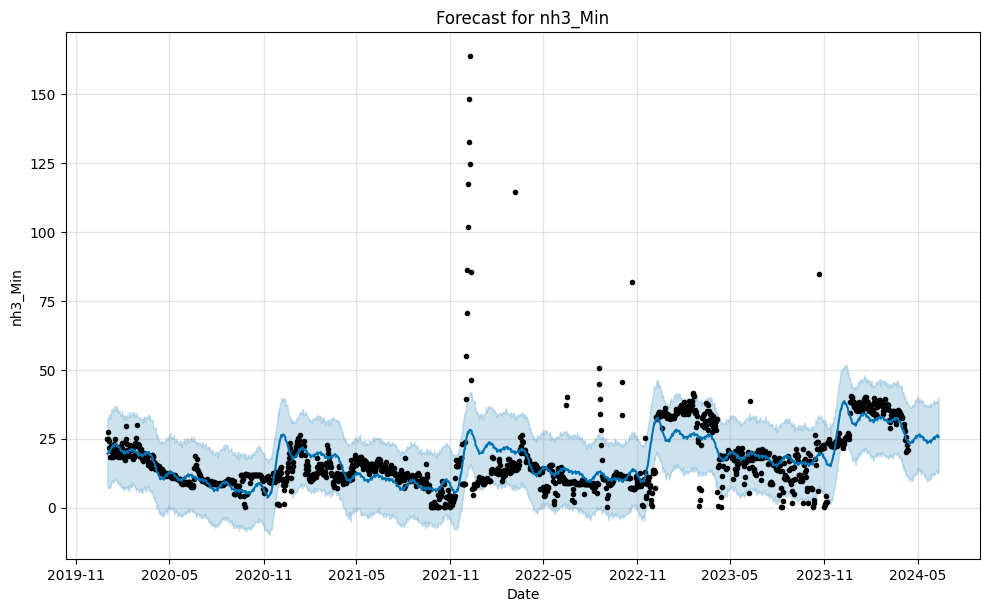

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1




Prediction of nh3_Min is 
       yhat_lower  yhat_upper       yhat
1617   12.776754   38.468718  25.883118
1618   13.332658   37.832898  26.023358
1619   12.508864   38.549661  26.344237
1620   12.235806   37.799342  25.426830
1621   12.814123   39.844959  25.754033
<class 'pandas.core.frame.DataFrame'>
value is [[12.77675414 38.46871765 25.88311844]
 [13.33265785 37.83289827 26.02335757]
 [12.50886376 38.54966112 26.3442371 ]
 [12.2358061  37.79934215 25.42682959]
 [12.81412285 39.84495871 25.75403317]]


/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/aee/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


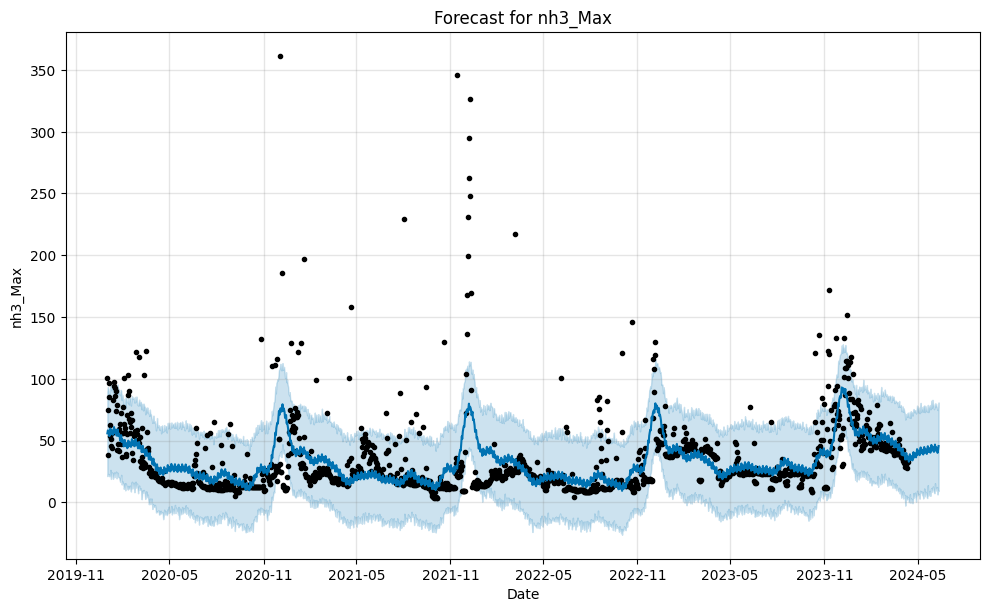



Prediction of nh3_Max is 
       yhat_lower  yhat_upper       yhat
1617   11.129989   77.567246  44.351740
1618   12.359619   75.809465  43.460276
1619    6.286387   74.702334  40.021006
1620    9.791897   77.381466  42.258773
1621    9.207847   80.859672  45.529110
<class 'pandas.core.frame.DataFrame'>
value is [[11.12998912 77.56724589 44.35173952]
 [12.35961869 75.80946467 43.46027586]
 [ 6.2863871  74.70233415 40.02100621]
 [ 9.79189717 77.38146636 42.25877325]
 [ 9.2078475  80.85967194 45.5291096 ]]


In [22]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Function to load and preprocess data
def load_and_preprocess_data(file_path):
    data = pd.read_excel(file_path)
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Convert non-numeric values to NaN and interpolate
    columns_to_convert = ['o3_Min', 'o3_Max', 'no2_Min', 'no2_Max', 'so2_Min', 'so2_Max', 'co_Min', 'co_Max', 
                          'pm1_Min', 'pm1_Max', 'pm25_Min', 'pm25_Max', 'pm10_Min', 'pm10_Max', 'nh3_Min', 'nh3_Max']
    for col in columns_to_convert:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    
    data = data.interpolate()
    return data, columns_to_convert

# Function to scale data
def scale_data(data, columns):
    scaler = MinMaxScaler()
    scaled_data = data.copy()
    scaled_data[columns] = scaler.fit_transform(data[columns])
    return scaled_data, scaler

# Function to prepare data for Prophet
def prepare_prophet_df(data, column_name):
    df = data[['Date', column_name]].rename(columns={'Date': 'ds', column_name: 'y'})
    return df

# Function to train Prophet model
def train_prophet_model(df):
    model = Prophet()
    model.fit(df)
    return model

# Function to forecast future values
def forecast_future(model, periods):
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    return forecast

# Function to plot forecast
def plot_forecast(model, forecast, param):
    fig = model.plot(forecast)
    plt.title(f'Forecast for {param}')
    plt.xlabel('Date')
    plt.ylabel(param)
    plt.show()

# Function to handle the entire workflow
def forecast_air_quality(file_path, n_days):
    # Load and preprocess data
    data, columns_to_convert = load_and_preprocess_data(file_path)
    
    # Scale data
    # scaled_data, scaler = scale_data(data, columns_to_convert)
    scaled_data = data
    
    # Define parameters
    parameters = columns_to_convert
    forecasts = {}
    
    # Forecast each parameter
    for param in parameters:
        df = prepare_prophet_df(scaled_data, param)
        model = train_prophet_model(df)
        forecast = forecast_future(model, n_days)
        forecasts[param] = forecast
        
        # # Inverse transform the forecast
        # forecast[['yhat', 'yhat_lower', 'yhat_upper']] = scaler.inverse_transform(
        #     forecast[['yhat', 'yhat_lower', 'yhat_upper']].clip(0, 1)  # Clip values to avoid issues with inverse transformation
        # )
        
        # Plot forecast
        plot_forecast(model, forecast, param)
        print(f"\n\nPrediction of {param} is \n {forecast[['yhat_lower', 'yhat_upper', 'yhat']].tail()}")
        print(type(forecast))
        
        value_param = forecast[['yhat_lower', 'yhat_upper', 'yhat']].tail().to_numpy()
        print(f"value is {value_param}")

    return forecasts

# Example usage
file_path = "Kolkata_AQI_Data.xlsx"
n_days = 60
forecasts = forecast_air_quality(file_path, n_days)


#### Compare using test & predict data

In [23]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Function to load and preprocess data
def load_and_preprocess_data(file_path):
    data = pd.read_excel(file_path)
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Convert non-numeric values to NaN and interpolate
    columns_to_convert = ['o3_Min', 'o3_Max', 'no2_Min', 'no2_Max', 'so2_Min', 'so2_Max', 'co_Min', 'co_Max', 
                          'pm1_Min', 'pm1_Max', 'pm25_Min', 'pm25_Max', 'pm10_Min', 'pm10_Max', 'nh3_Min', 'nh3_Max']
    for col in columns_to_convert:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    
    data = data.interpolate()
    return data, columns_to_convert

# Function to scale data
def scale_data(data, columns):
    scaler = MinMaxScaler()
    scaled_data = data.copy()
    scaled_data[columns] = scaler.fit_transform(data[columns])
    return scaled_data, scaler

# Function to prepare data for Prophet
def prepare_prophet_df(data, column_name):
    df = data[['Date', column_name]].rename(columns={'Date': 'ds', column_name: 'y'})
    return df

# Function to train Prophet model
def train_prophet_model(df):
    model = Prophet()
    model.fit(df)
    return model

# Function to forecast future values
def forecast_future(model, periods):
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    return forecast

# Function to plot forecast
def plot_forecast(model, forecast, param):
    fig = model.plot(forecast)
    plt.title(f'Forecast for {param}')
    plt.xlabel('Date')
    plt.ylabel(param)
    plt.show()

# Function to handle the entire workflow
def forecast_air_quality(file_path, n_days):
    # Load and preprocess data
    data, columns_to_convert = load_and_preprocess_data(file_path)
    
    # Split data into training and testing sets
    test_size = 10
    test_data = data.tail(test_size)
    train_data = data.iloc[:-test_size]
    
    # Scale data
    scaled_train_data, scaler = scale_data(train_data, columns_to_convert)
    scaled_test_data = scaler.transform(test_data[columns_to_convert])
    scaled_test_data = pd.DataFrame(scaled_test_data, columns=columns_to_convert)
    scaled_test_data['Date'] = test_data['Date'].reset_index(drop=True)
    
    # Define parameters
    parameters = columns_to_convert
    forecasts = {}
    
    # Dictionary to store NumPy arrays for each parameter
    forecast_arrays = {}
    test_arrays = {}
    
    # Forecast each parameter
    for param in parameters:
        # Prepare training data for Prophet
        df_train = prepare_prophet_df(scaled_train_data, param)
        model = train_prophet_model(df_train)
        
        # Forecast the next n_days
        forecast = forecast_future(model, n_days)
        forecasts[param] = forecast
        
        # Extract forecast values
        forecast_values = forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']].tail(n_days)
        forecast_array = forecast_values[['yhat']].to_numpy().flatten()
        forecast_arrays[param] = forecast_array
        
        # Extract actual values from test data
        actual_values = scaled_test_data[param].to_numpy()
        test_arrays[param] = actual_values
        
        # Calculate error metrics
        mae = mean_absolute_error(actual_values, forecast_array)
        mse = mean_squared_error(actual_values, forecast_array)
        
        print(f"Parameter: {param}")
        print(f"Mean Absolute Error: {mae}")
        print(f"Mean Squared Error: {mse}")
        print("\n")

    return forecast_arrays, test_arrays

# Example usage
file_path = "Kolkata_AQI_Data.xlsx"
n_days = 10
forecast_arrays, test_arrays = forecast_air_quality(file_path, n_days)


/tmp/ipykernel_5687/2707041729.py:19: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data = data.interpolate()
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Parameter: o3_Min
Mean Absolute Error: 0.04250001648010121
Mean Squared Error: 0.002361663849581303




INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Parameter: o3_Max
Mean Absolute Error: 0.176705867805974
Mean Squared Error: 0.03907161733891155




INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Parameter: no2_Min
Mean Absolute Error: 0.1940064237870664
Mean Squared Error: 0.08599060004044977




INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Parameter: no2_Max
Mean Absolute Error: 0.09797581616238216
Mean Squared Error: 0.014854316146934795




INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Parameter: so2_Min
Mean Absolute Error: 0.04819019483486163
Mean Squared Error: 0.003991730696505395




INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Parameter: so2_Max
Mean Absolute Error: 0.07601885452893
Mean Squared Error: 0.025894589693116386




INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Parameter: co_Min
Mean Absolute Error: 0.006560372065862021
Mean Squared Error: 6.931885816890783e-05




INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Parameter: co_Max
Mean Absolute Error: 0.0247334976272123
Mean Squared Error: 0.0009542771653419666




INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Parameter: pm1_Min
Mean Absolute Error: 0.10407664589313977
Mean Squared Error: 0.011162300225424766




INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Parameter: pm1_Max
Mean Absolute Error: 0.046413231103855354
Mean Squared Error: 0.002174717093068175




INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Parameter: pm25_Min
Mean Absolute Error: 0.07728725808247916
Mean Squared Error: 0.010671538100336738




INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Parameter: pm25_Max
Mean Absolute Error: 0.05651631587293784
Mean Squared Error: 0.005861273000172353




INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Parameter: pm10_Min
Mean Absolute Error: 0.08177992468338798
Mean Squared Error: 0.013229812899644419




INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Parameter: pm10_Max
Mean Absolute Error: 0.049751473643414514
Mean Squared Error: 0.0038801565177808877




INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Parameter: nh3_Min
Mean Absolute Error: 0.014563998141378065
Mean Squared Error: 0.00026675957035220013


Parameter: nh3_Max
Mean Absolute Error: 0.01925566829224546
Mean Squared Error: 0.00040217909370983634




/tmp/ipykernel_5687/1145953609.py:19: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data = data.interpolate()
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Parameter: o3_Min
Mean Absolute Error: 0.04250001648010121
Mean Squared Error: 0.002361663849581303


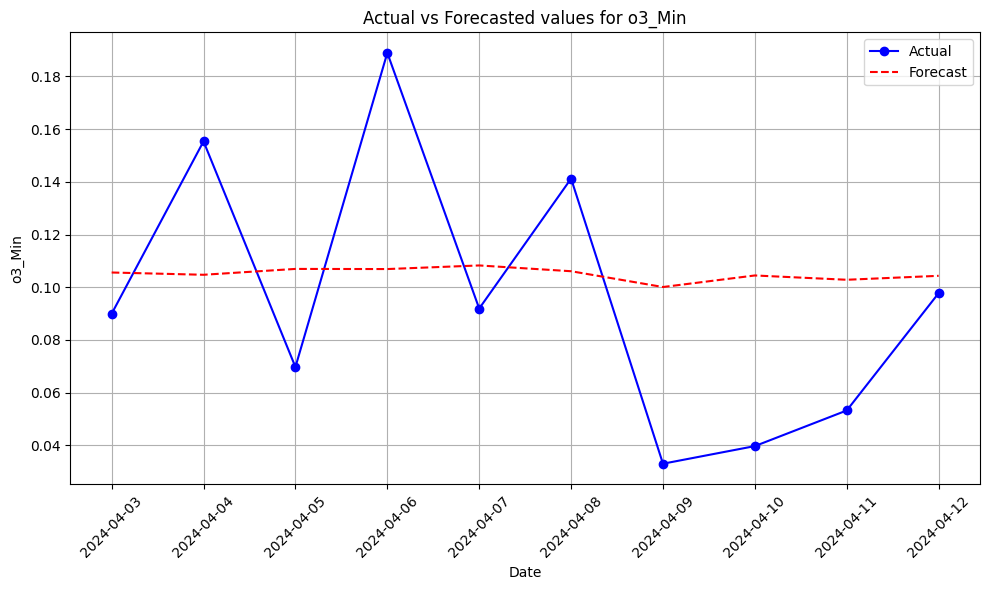

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1


INFO:cmdstanpy:finish chain 1


Parameter: o3_Max
Mean Absolute Error: 0.176705867805974
Mean Squared Error: 0.03907161733891155


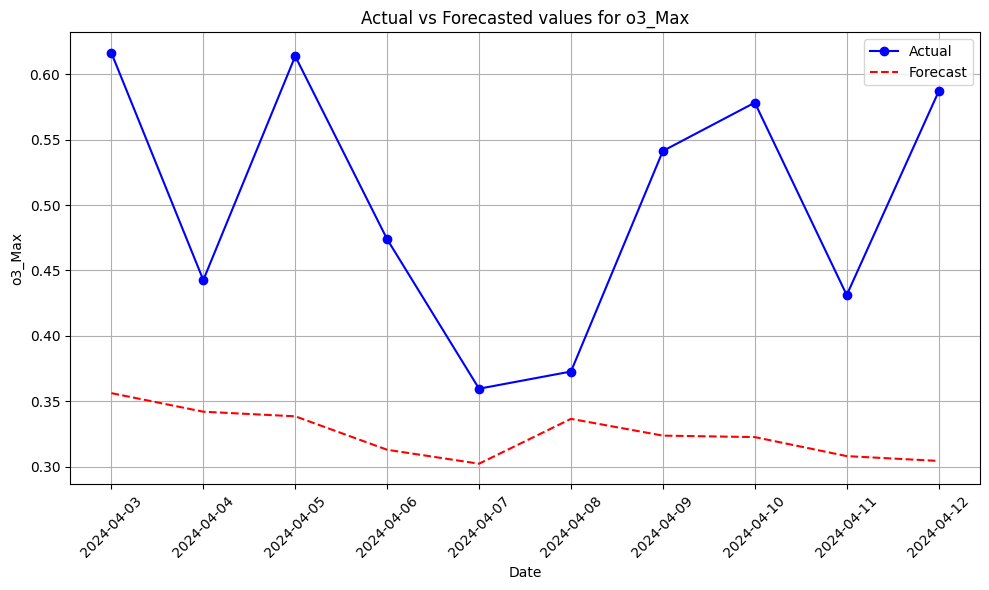

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Parameter: no2_Min
Mean Absolute Error: 0.1940064237870664
Mean Squared Error: 0.08599060004044977


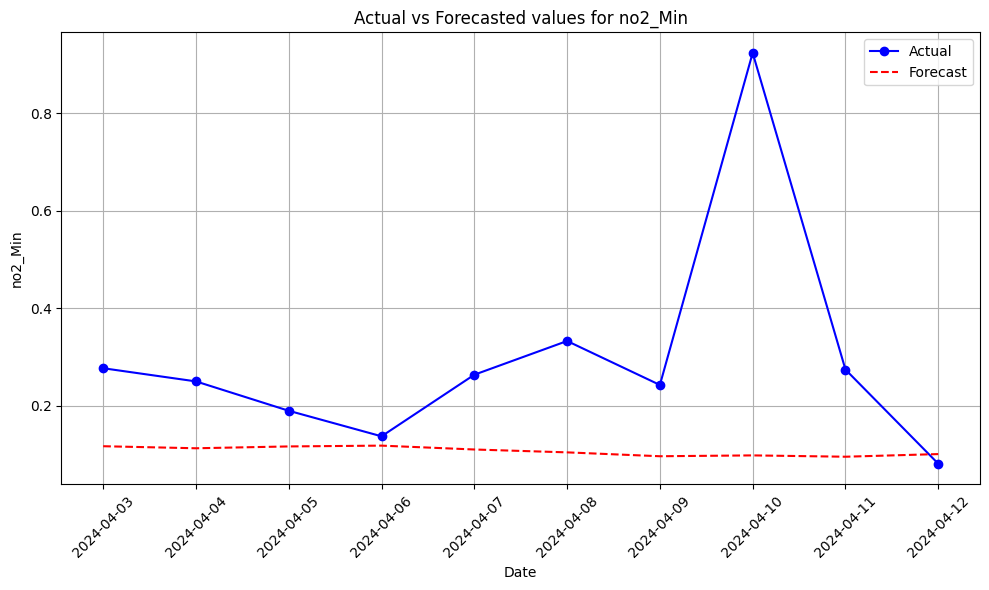

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1


INFO:cmdstanpy:finish chain 1


Parameter: no2_Max
Mean Absolute Error: 0.09797581616238216
Mean Squared Error: 0.014854316146934795


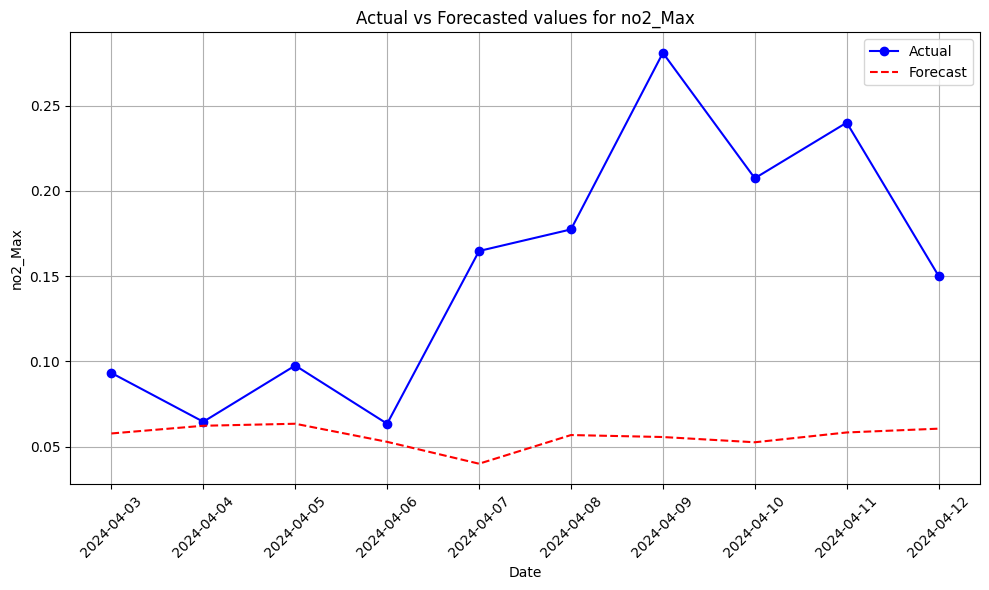

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1


INFO:cmdstanpy:finish chain 1


Parameter: so2_Min
Mean Absolute Error: 0.04819019483486163
Mean Squared Error: 0.003991730696505395


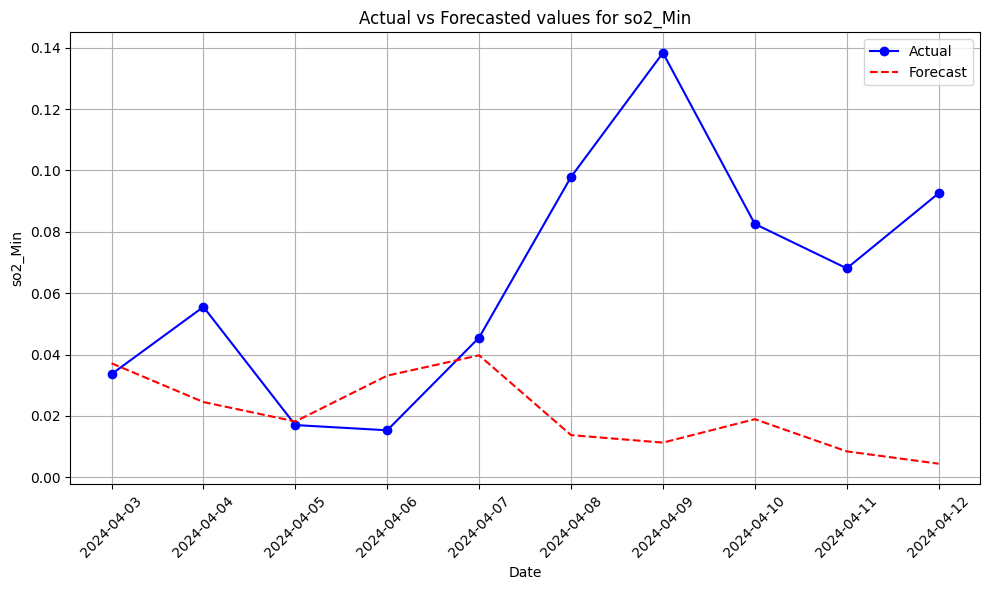

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1




Parameter: so2_Max
Mean Absolute Error: 0.07601885452893
Mean Squared Error: 0.025894589693116386


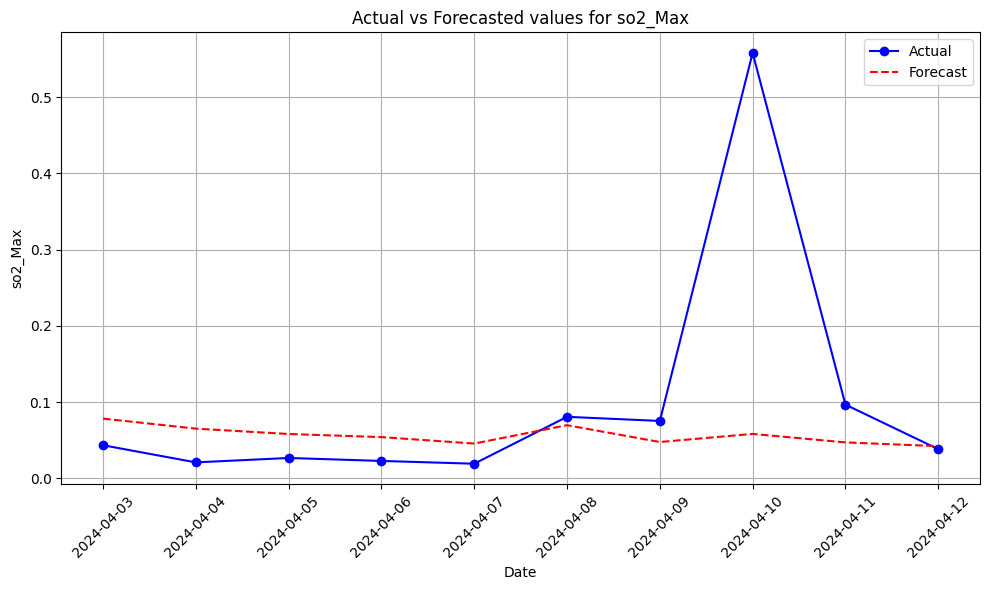

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1


INFO:cmdstanpy:finish chain 1


Parameter: co_Min
Mean Absolute Error: 0.006560372065862021
Mean Squared Error: 6.931885816890783e-05


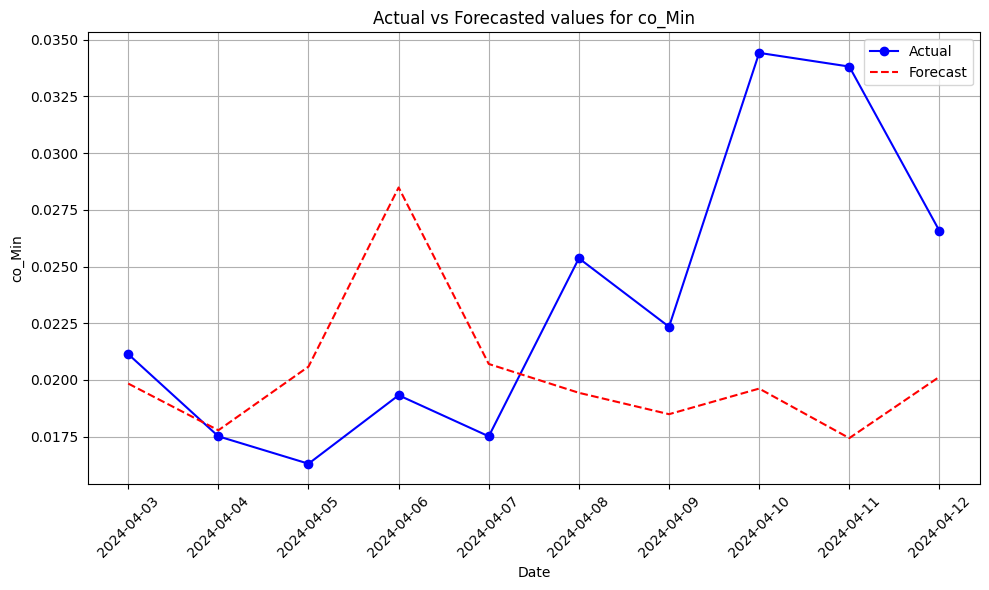

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1




Parameter: co_Max
Mean Absolute Error: 0.0247334976272123
Mean Squared Error: 0.0009542771653419666


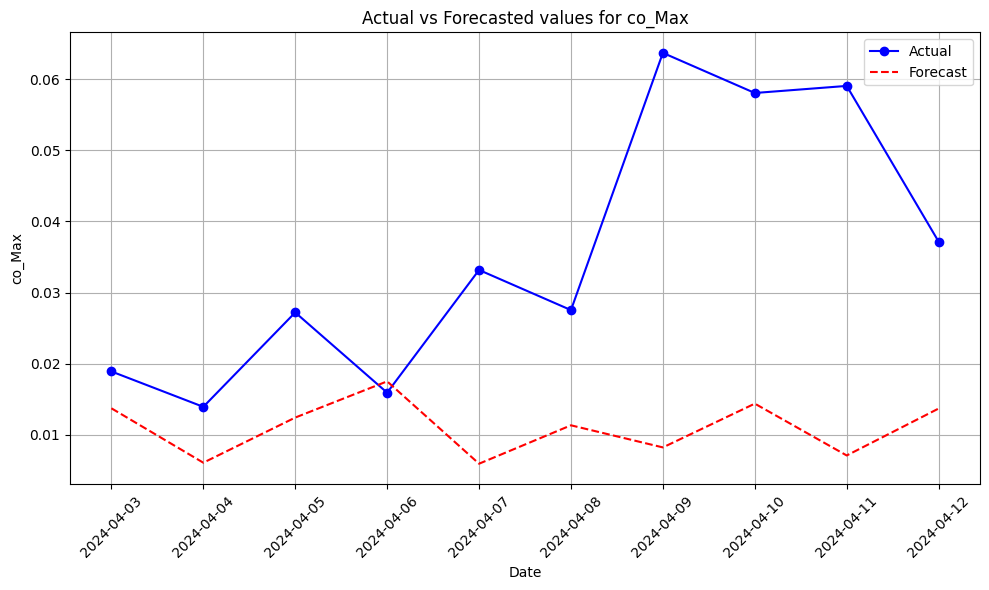

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1


INFO:cmdstanpy:finish chain 1


Parameter: pm1_Min
Mean Absolute Error: 0.10407664589313977
Mean Squared Error: 0.011162300225424766


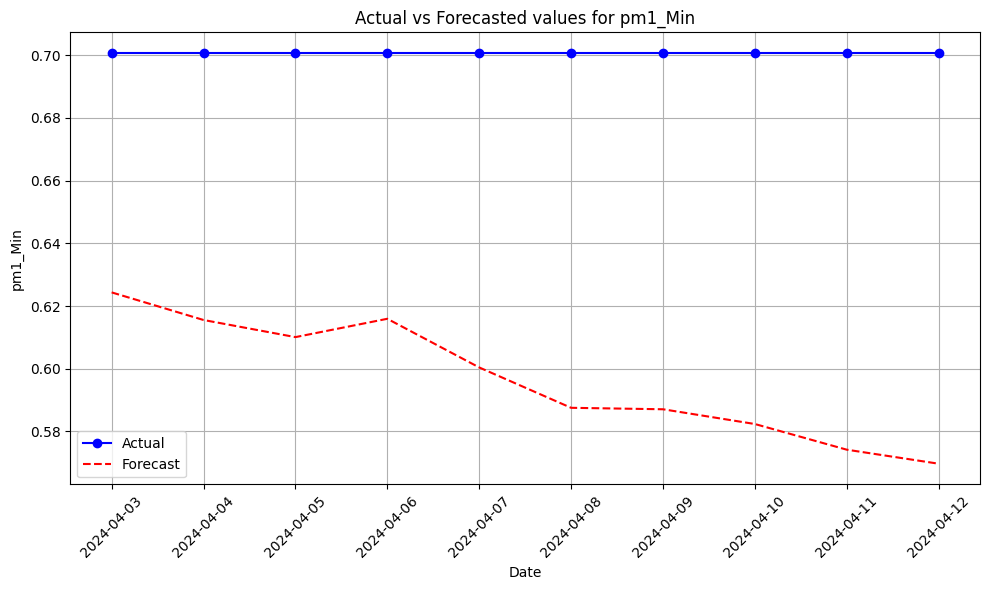

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1


INFO:cmdstanpy:finish chain 1


Parameter: pm1_Max
Mean Absolute Error: 0.046413231103855354
Mean Squared Error: 0.002174717093068175


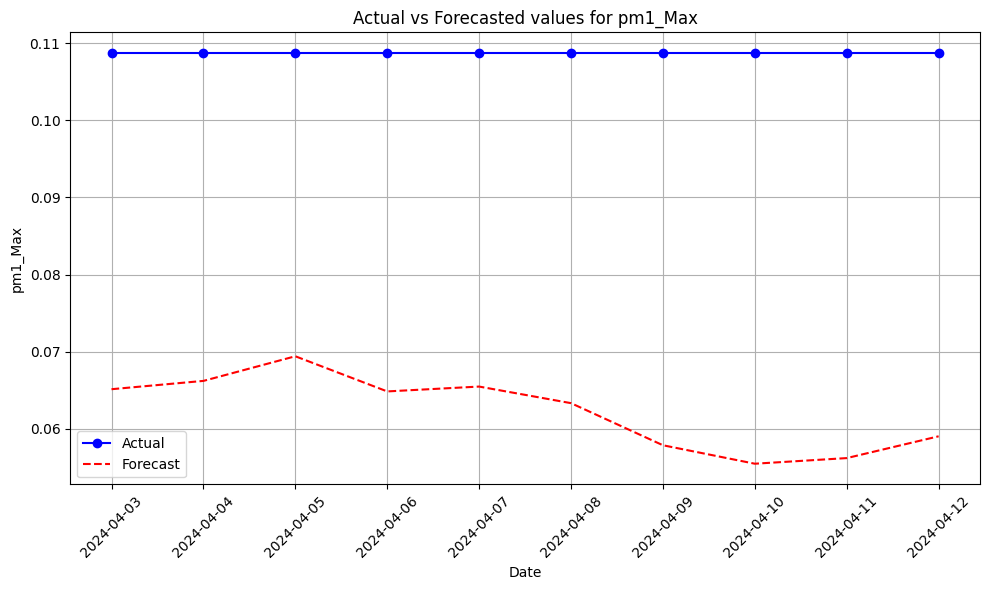

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1




Parameter: pm25_Min
Mean Absolute Error: 0.07728725808247916
Mean Squared Error: 0.010671538100336738


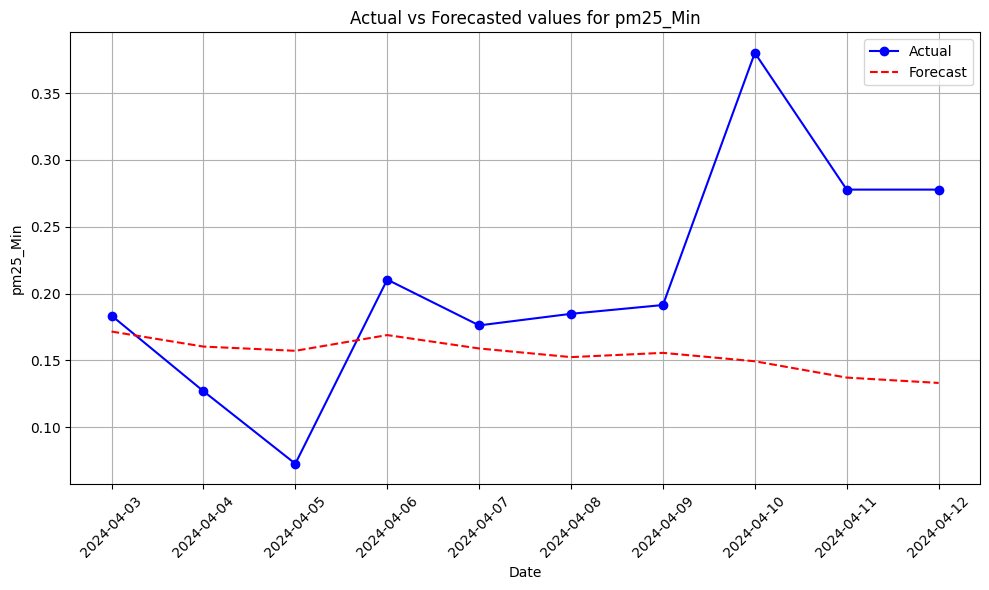

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1


INFO:cmdstanpy:finish chain 1


Parameter: pm25_Max
Mean Absolute Error: 0.05651631587293784
Mean Squared Error: 0.005861273000172353


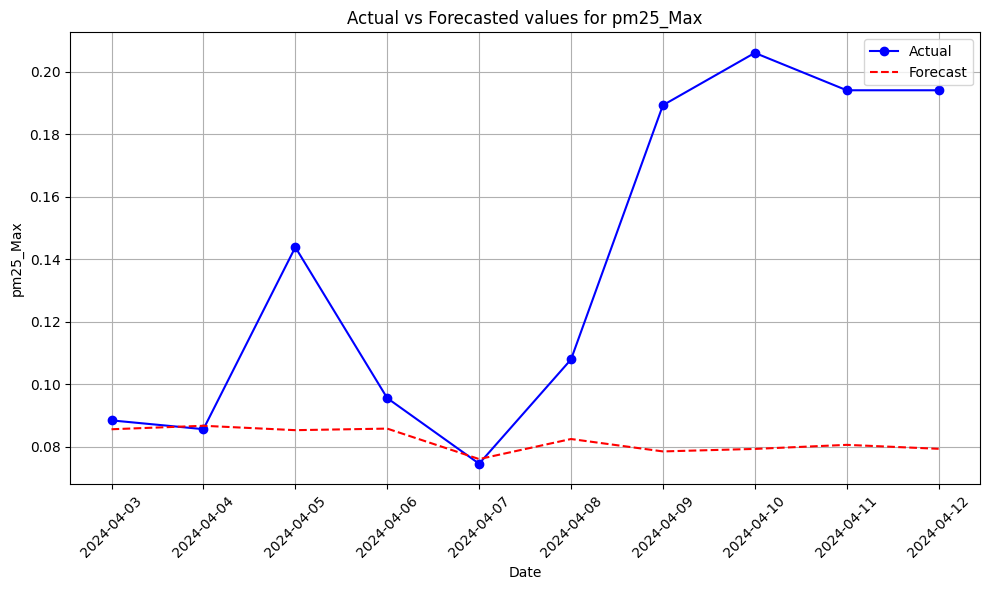

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1




Parameter: pm10_Min
Mean Absolute Error: 0.08177992468338798
Mean Squared Error: 0.013229812899644419


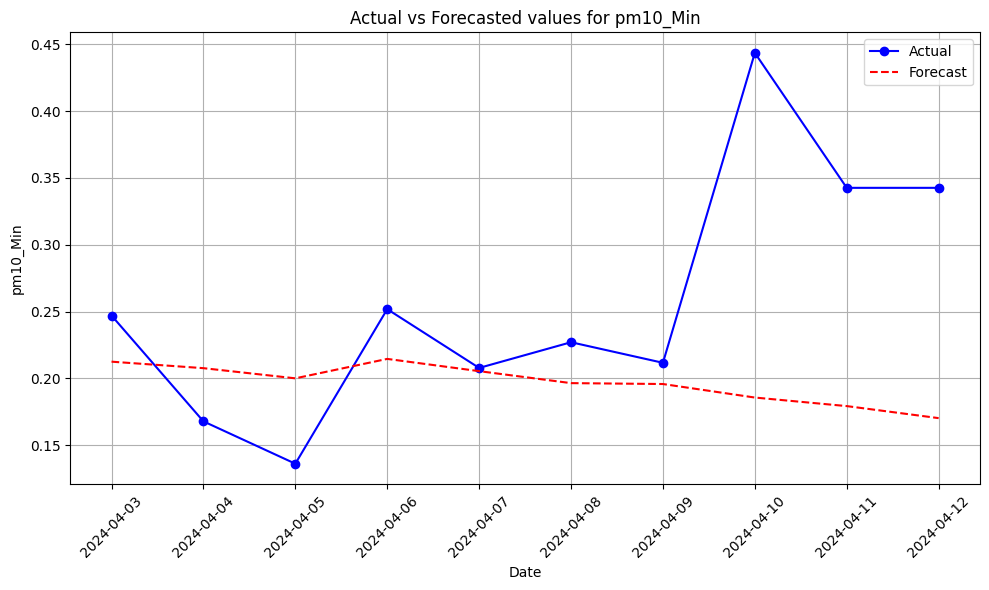

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1


INFO:cmdstanpy:finish chain 1


Parameter: pm10_Max
Mean Absolute Error: 0.049751473643414514
Mean Squared Error: 0.0038801565177808877


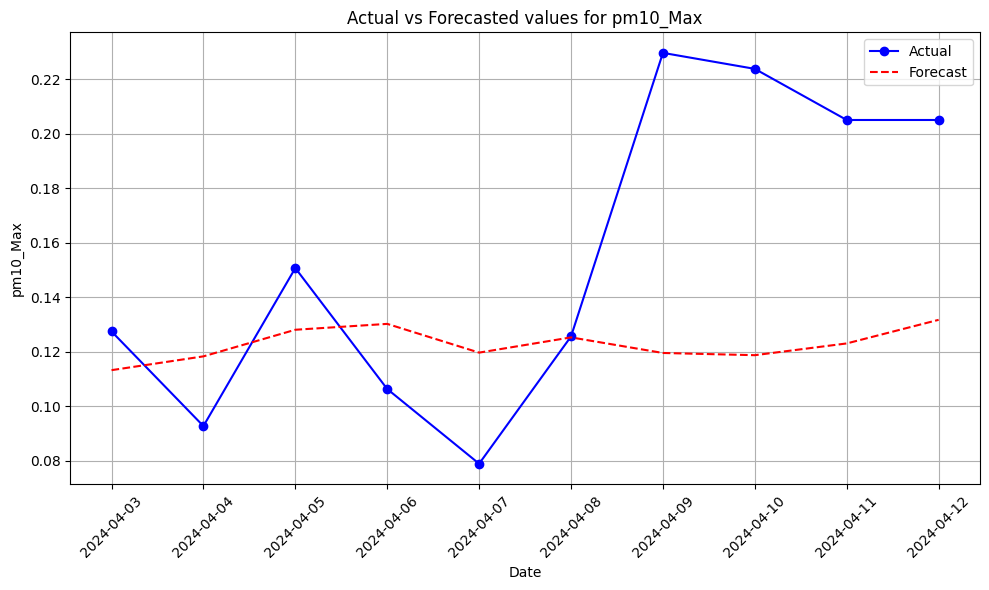

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1




Parameter: nh3_Min
Mean Absolute Error: 0.014563998141378065
Mean Squared Error: 0.00026675957035220013


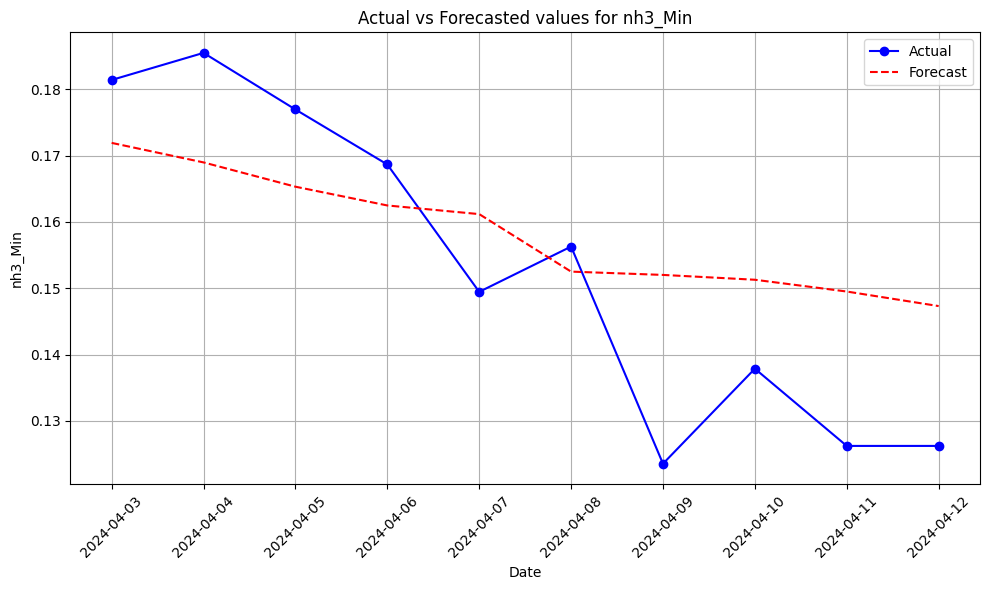

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1


INFO:cmdstanpy:finish chain 1


Parameter: nh3_Max
Mean Absolute Error: 0.01925566829224546
Mean Squared Error: 0.00040217909370983634


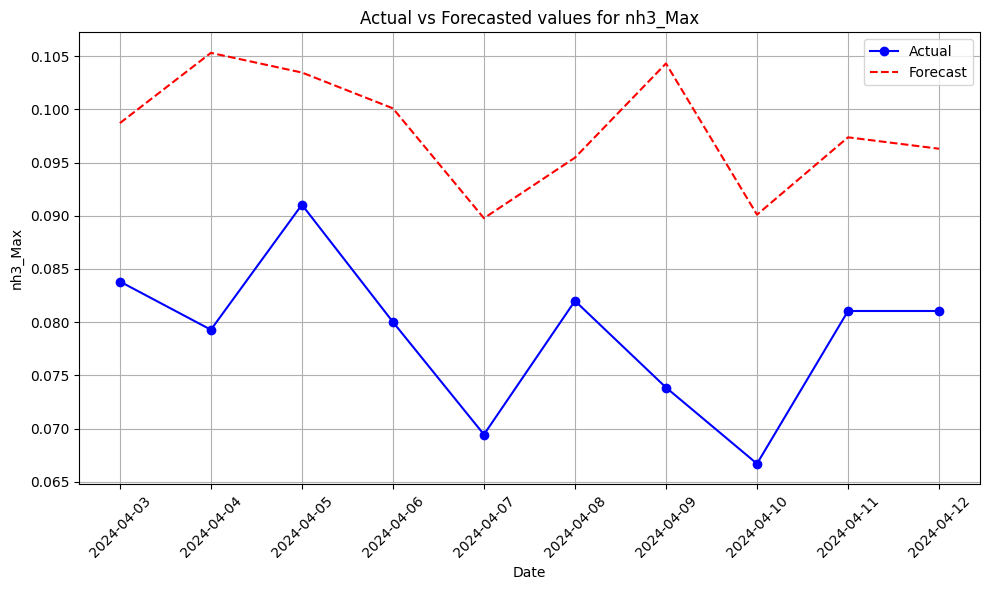

In [24]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Function to load and preprocess data
def load_and_preprocess_data(file_path):
    data = pd.read_excel(file_path)
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Convert non-numeric values to NaN and interpolate
    columns_to_convert = ['o3_Min', 'o3_Max', 'no2_Min', 'no2_Max', 'so2_Min', 'so2_Max', 'co_Min', 'co_Max', 
                          'pm1_Min', 'pm1_Max', 'pm25_Min', 'pm25_Max', 'pm10_Min', 'pm10_Max', 'nh3_Min', 'nh3_Max']
    for col in columns_to_convert:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    
    data = data.interpolate()
    return data, columns_to_convert

# Function to scale data
def scale_data(data, columns):
    scaler = MinMaxScaler()
    scaled_data = data.copy()
    scaled_data[columns] = scaler.fit_transform(data[columns])
    return scaled_data, scaler

# Function to prepare data for Prophet
def prepare_prophet_df(data, column_name):
    df = data[['Date', column_name]].rename(columns={'Date': 'ds', column_name: 'y'})
    return df

# Function to train Prophet model
def train_prophet_model(df):
    model = Prophet()
    model.fit(df)
    return model

# Function to forecast future values
def forecast_future(model, periods):
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    return forecast

# Function to plot forecast
def plot_forecast(actual_dates, actual_values, forecast_dates, forecast_values, param):
    plt.figure(figsize=(10, 6))
    plt.plot(actual_dates, actual_values, label='Actual', color='blue', marker='o')
    plt.plot(forecast_dates, forecast_values, label='Forecast', color='red', linestyle='--')
    plt.title(f'Actual vs Forecasted values for {param}')
    plt.xlabel('Date')
    plt.ylabel(param)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Function to handle the entire workflow
def forecast_air_quality(file_path, n_days):
    # Load and preprocess data
    data, columns_to_convert = load_and_preprocess_data(file_path)
    
    # Split data into training and testing sets
    test_size = 10
    test_data = data.tail(test_size)
    train_data = data.iloc[:-test_size]
    
    # Scale data
    scaled_train_data, scaler = scale_data(train_data, columns_to_convert)
    scaled_test_data = scaler.transform(test_data[columns_to_convert])
    scaled_test_data = pd.DataFrame(scaled_test_data, columns=columns_to_convert)
    scaled_test_data['Date'] = test_data['Date'].reset_index(drop=True)
    
    # Define parameters
    parameters = columns_to_convert
    forecasts = {}
    
    # Dictionary to store NumPy arrays for each parameter
    forecast_arrays = {}
    test_arrays = {}
    
    # Forecast each parameter
    for param in parameters:
        # Prepare training data for Prophet
        df_train = prepare_prophet_df(scaled_train_data, param)
        model = train_prophet_model(df_train)
        
        # Forecast the next n_days
        forecast = forecast_future(model, n_days)
        forecasts[param] = forecast
        
        # Extract forecast values
        forecast_values = forecast[['ds', 'yhat']].tail(n_days)
        forecast_dates = forecast_values['ds'].values
        forecast_array = forecast_values['yhat'].to_numpy()
        forecast_arrays[param] = forecast_array
        
        # Extract actual values from test data
        actual_values = scaled_test_data[param].to_numpy()
        test_arrays[param] = actual_values
        actual_dates = scaled_test_data['Date'].values
        
        # Calculate error metrics
        mae = mean_absolute_error(actual_values, forecast_array)
        mse = mean_squared_error(actual_values, forecast_array)
        
        print(f"Parameter: {param}")
        print(f"Mean Absolute Error: {mae}")
        print(f"Mean Squared Error: {mse}")
        
        # Plot actual vs forecasted values
        # plot_forecast(actual_dates, actual_values, forecast_dates, forecast_array, param)
        print("\n")

    return forecast_arrays, test_arrays

# Example usage
file_path = "Kolkata_AQI_Data.xlsx"
n_days = 10
forecast_arrays, test_arrays = forecast_air_quality(file_path, n_days)




In [27]:
columns= ['o3_Min', 'o3_Max', 'no2_Min', 'no2_Max', 'so2_Min', 'so2_Max', 'co_Min', 'co_Max', 
                          'pm1_Min', 'pm1_Max', 'pm25_Min', 'pm25_Max', 'pm10_Min', 'pm10_Max', 'nh3_Min', 'nh3_Max']

# for i in range(len(columns)):
#     print(f"Predicted result {columns[i]} is \n {forecast_arrays[columns[i]]} \n\n")
###########################
forecast_arrays['o3_Max'][0][1]


array([0.61614285, 0.44268979, 0.61361408, 0.47386076, 0.35975641,
       0.37286474, 0.54126026, 0.57815967, 0.4312329 , 0.58667492])

#### Final Tesing

In [23]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Function to load and preprocess data
def load_and_preprocess_data(file_path):
    data = pd.read_excel(file_path)
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Convert non-numeric values to NaN and interpolate
    columns_to_convert = ['o3_Min', 'o3_Max', 'no2_Min', 'no2_Max', 'so2_Min', 'so2_Max', 'co_Min', 'co_Max', 
                          'pm1_Min', 'pm1_Max', 'pm25_Min', 'pm25_Max', 'pm10_Min', 'pm10_Max', 'nh3_Min', 'nh3_Max']
    for col in columns_to_convert:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    
    data = data.interpolate()
    return data, columns_to_convert

# Function to scale data
def scale_data(data, columns):
    scaler = MinMaxScaler()
    scaled_data = data.copy()
    scaled_data[columns] = scaler.fit_transform(data[columns])
    return scaled_data, scaler

# Function to prepare data for Prophet
def prepare_prophet_df(data, column_name):
    df = data[['Date', column_name]].rename(columns={'Date': 'ds', column_name: 'y'})
    return df

# Function to train Prophet model
def train_prophet_model(df):
    model = Prophet()
    model.fit(df)
    return model

# Function to forecast future values
def forecast_future(model, periods):
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    return forecast

# Function to plot forecast
def plot_forecast(model, forecast, param):
    fig = model.plot(forecast)
    plt.title(f'Forecast for {param}')
    plt.xlabel('Date')
    plt.ylabel(param)
    plt.show()

# Function to handle the entire workflow
def forecast_air_quality(file_path, n_days):
    # Load and preprocess data
    data, columns_to_convert = load_and_preprocess_data(file_path)
    
    # Scale data
    # scaled_data, scaler = scale_data(data, columns_to_convert)
    scaled_data = data
    
    # Define parameters
    parameters = columns_to_convert
    forecasts = {}
    
    # Dictionary to store NumPy arrays for each parameter
    forecast_arrays = {}
    
    # Forecast each parameter
    for param in parameters:
        df = prepare_prophet_df(scaled_data, param)
        model = train_prophet_model(df)
        forecast = forecast_future(model, n_days)
        forecasts[param] = forecast
        
        # Extract forecast values for the desired number of days
        forecast_values = forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']].tail(n_days)
        
        # Convert forecast values to a NumPy array and store it
        forecast_array = forecast_values.to_numpy()
        forecast_arrays[param] = forecast_array
        
        # Print the last few rows of forecast
        # print(f"\n\nPrediction of {param} is \n {forecast_values}")
        # print(f"NumPy array for {param} forecast values: \n {forecast_array}")

    return forecast_arrays

# Example usage
file_path = "Kolkata_AQI_Data.xlsx"
n_days = 5
forecast_arrays = forecast_air_quality(file_path, n_days)


11:59:31 - cmdstanpy - INFO - Chain [1] start processing
11:59:31 - cmdstanpy - INFO - Chain [1] done processing
11:59:31 - cmdstanpy - INFO - Chain [1] start processing
11:59:31 - cmdstanpy - INFO - Chain [1] done processing
11:59:32 - cmdstanpy - INFO - Chain [1] start processing
11:59:32 - cmdstanpy - INFO - Chain [1] done processing
11:59:32 - cmdstanpy - INFO - Chain [1] start processing
11:59:32 - cmdstanpy - INFO - Chain [1] done processing
11:59:33 - cmdstanpy - INFO - Chain [1] start processing
11:59:33 - cmdstanpy - INFO - Chain [1] done processing
11:59:33 - cmdstanpy - INFO - Chain [1] start processing
11:59:33 - cmdstanpy - INFO - Chain [1] done processing
11:59:33 - cmdstanpy - INFO - Chain [1] start processing
11:59:33 - cmdstanpy - INFO - Chain [1] done processing
11:59:34 - cmdstanpy - INFO - Chain [1] start processing
11:59:34 - cmdstanpy - INFO - Chain [1] done processing
11:59:34 - cmdstanpy - INFO - Chain [1] start processing
11:59:34 - cmdstanpy - INFO - Chain [1]

In [52]:
(forecast_arrays['o3_Max'][4][2])

109.23967064268315

In [24]:
date_range = []
for i in range(len(forecast_arrays['o3_Min'])):
    date_range.append(forecast_arrays['o3_Min'][i][0])

def calculate_min_max_values(forecast_arrays):
    pollutants = ['o3', 'no2', 'so2', 'co', 'pm1', 'pm25', 'pm10', 'nh3']
    min_values = {}
    max_values = {}

    for pollutant in pollutants:
        min_key = f'{pollutant}_Min'
        max_key = f'{pollutant}_Max'
        
        min_value = forecast_arrays[min_key][0][1]
        max_value = forecast_arrays[max_key][0][2]
        
        min_values[f'{pollutant}_MIN'] = min(min_value, max_value)
        max_values[f'{pollutant}_MAX'] = max(min_value, max_value)

    print("Minimim Value - ", min_values)
    print("Maximum value - ", max_values)

    return min_values, max_values


def calculate_avg_min_max_values(forecast_arrays):
    pollutants = ['o3', 'no2', 'so2', 'co', 'pm1', 'pm25', 'pm10', 'nh3']
    avg_min_values = {}
    avg_max_values = {}

    for pollutant in pollutants:
        min_key = f'{pollutant}_Min'
        max_key = f'{pollutant}_Max'
        
        min_value = forecast_arrays[min_key][0][3]
        max_value = forecast_arrays[max_key][0][3]
        
        avg_min_values[f'{pollutant}_AVG_MIN'] = min(min_value, max_value)
        avg_max_values[f'{pollutant}_AVG_MAX'] = max(min_value, max_value)

    print("Avg Minimum value - ", avg_min_values)
    print("Avg Maximum value - ", avg_max_values)

    return avg_min_values, avg_max_values

min_values, max_values = calculate_min_max_values(forecast_arrays)
avg_min_values, avg_max_values = calculate_avg_min_max_values(forecast_arrays)


Minimim Value -  {'o3_MIN': 3.785994042721053, 'no2_MIN': 2.6515276521776734, 'so2_MIN': -5.0807960889163555, 'co_MIN': -0.33926742111755503, 'pm1_MIN': 34.88973620736374, 'pm25_MIN': 0.7850336473964517, 'pm10_MIN': 13.817291041501996, 'nh3_MIN': 9.956439110490583}
Maximum value -  {'o3_MAX': 104.36765805514958, 'no2_MAX': 52.01292803501357, 'so2_MAX': 32.39209006628506, 'co_MAX': 2.7599008115705703, 'pm1_MAX': 111.25380760278952, 'pm25_MAX': 106.11635290403377, 'pm10_MAX': 240.2547033445396, 'nh3_MAX': 71.08822251717567}
Avg Minimum value -  {'o3_AVG_MIN': 13.443280894705437, 'no2_AVG_MIN': 7.985148370547881, 'so2_AVG_MIN': 1.4664514927415728, 'co_AVG_MIN': 0.4840244202459287, 'pm1_AVG_MIN': 50.75310136038767, 'pm25_AVG_MIN': 22.272281588944757, 'pm10_AVG_MIN': 49.373092563673886, 'nh3_AVG_MIN': 23.954344825063494}
Avg Maximum value -  {'o3_AVG_MAX': 66.39414755065603, 'no2_AVG_MAX': 21.824534480806207, 'so2_AVG_MAX': 12.647561345560177, 'co_AVG_MAX': 0.7764610492529826, 'pm1_AVG_MAX'

In [31]:
type(min_values)

dict

In [25]:
# PM10 SUB INDEX CALCULATION
def calculate_pm10_category(pm10):
    if not isinstance(pm10, str):
        if pm10 <= 50:
            return pm10
        elif 50 < pm10 <= 100:
            return pm10
        elif 100 < pm10 <= 250:
            return 100 + (pm10 - 100) * 100 / 150
        elif 250 < pm10 <= 350:
            return 200 + (pm10 - 250)
        elif 350 < pm10 <= 430:
            return 300 + (pm10 - 350) * (100 / 80)
        elif pm10 > 430:
            return 400 + (pm10 - 430) * (100 / 80)
    else:
        return 0

# PM2.5 SUB INDEX CALCULATION
def calculate_pm25_category(pm25):
    if not isinstance(pm25, str):
        if pm25 <= 30:
            return pm25 * 50 / 30
        elif 30 < pm25 <= 60:
            return 50 + (pm25 - 30) * 50 / 30
        elif 60 < pm25 <= 90:
            return 100 + (pm25 - 60) * 100 / 30
        elif 90 < pm25 <= 120:
            return 200 + (pm25 - 90) * (100 / 30)
        elif 120 < pm25 <= 250:
            return 300 + (pm25 - 120) * (100 / 130)
        elif pm25 > 250:
            return 400 + (pm25 - 250) * (100 / 130)
    else:
        return 0
    
# SO2 SUB INDEX CALCULATION
def calculate_so2_category(so2):
    if not isinstance(so2, str):
        if so2 <= 40:
            return so2 * 50 / 40
        elif 40 < so2 <= 80:
            return 50 + (so2 - 40) * 50 / 40
        elif 80 < so2 <= 380:
            return 100 + (so2 - 80) * 100 / 300
        elif 380 < so2 <= 800:
            return 200 + (so2 - 380) * (100 / 420)
        elif 800 < so2 <= 1600:
            return 300 + (so2 - 800) * (100 / 800)
        elif so2 > 1600:
            return 400 + (so2 - 1600) * (100 / 800)
    else:
        return 0
    
# NO2 SUB INDEX CALCULATION
def calculate_no2_category(no2):
    if not isinstance(no2, str):
        if no2 <= 40:
            return no2 * 50 / 40
        elif 40 < no2 <= 80:
            return 50 + (no2 - 40) * 50 / 40
        elif 80 < no2 <= 180:
            return 100 + (no2 - 80) * 100 / 100
        elif 180 < no2 <= 280:
            return 200 + (no2 - 180) * (100 / 100)
        elif 280 < no2 <= 400:
            return 300 + (no2 - 280) * (100 / 120)
        elif no2 > 400:
            return 400 + (no2 - 400) * (100 / 120)
    else:
        return 0
    
# CO SUB INDEX CALCULATION
def calculate_co_category(co):
    if not isinstance(co, str):
        if co <= 1:
            return co * 50 / 1
        elif 1 < co <= 2:
            return 50 + (co - 1) * 50 / 1
        elif 2 < co <= 10:
            return 100 + (co - 2) * 100 / 8
        elif 10 < co <= 17:
            return 200 + (co - 10) * (100 / 7)
        elif 17 < co <= 34:
            return 300 + (co - 17) * (100 / 17)
        elif co > 34:
            return 400 + (co - 34) * (100 / 17)
    else:
        return 0
# O3 SUB INDEX CALCULATION
def calculate_o3_category(o3):
    if not isinstance(o3, str):
        if o3 <= 50:
            return o3 * 50 / 50
        elif 50 < o3 <= 100:
            return 50 + (o3 - 50) * 50 / 50
        elif 100 < o3 <= 168:
            return 100 + (o3 - 100) * 100 / 68
        elif 168 < o3 <= 208:
            return 200 + (o3 - 168) * (100 / 40)
        elif 208 < o3 <= 748:
            return 300 + (o3 - 208) * (100 / 539)
        elif o3 > 748:
            return 400 + (o3 - 400) * (100 / 539)
    else:
        return 0
    
# NH3 SUB INDEX CALCULATION
def calculate_nh3_category(nh3):
    if not isinstance(nh3, str):
        if nh3 <= 200:
            return nh3 * 50 / 200
        elif 200 < nh3 <= 400:
            return 50 + (nh3 - 200) * 50 / 200
        elif 400 < nh3 <= 800:
            return 100 + (nh3 - 400) * 100 / 400
        elif 800 < nh3 <= 1200:
            return 200 + (nh3 - 800) * (100 / 400)
        elif 1200 < nh3 <= 1800:
            return 300 + (nh3 - 1200) * (100 / 600)
        elif nh3 > 1800:
            return 400 + (nh3 - 1800) * (100 / 600)
    else:
        return 0
    
# AQI CALCULATOR
def aqi_calculator(pm10_result, pm25_result, so2_result,no2_result,co_result,o3_result,nh3_result):
    if(pm10_result>=1):
        aqi = pm10_result
    if(pm25_result>=1):
        aqi = pm25_result if (pm25_result>aqi) else aqi
    if(so2_result>=1):
        aqi = so2_result if (so2_result>aqi) else aqi
    if(no2_result>=1):
        aqi = no2_result if (no2_result>aqi) else aqi
    if(co_result>=1):
        aqi = co_result if (co_result>aqi) else aqi
    if(o3_result>=1):
        aqi = o3_result if (o3_result>aqi) else aqi
    if(nh3_result>=1):
        aqi = nh3_result if (nh3_result>aqi) else aqi
             
    return(aqi)

def calculate_min_max_values(i, forecast_arrays):
    pollutants = ['o3', 'no2', 'so2', 'co', 'pm1', 'pm25', 'pm10', 'nh3']
    min_values = {}
    max_values = {}

    for pollutant in pollutants:
        min_key = f'{pollutant}_Min'
        max_key = f'{pollutant}_Max'
        
        min_value = forecast_arrays[min_key][i][1]
        max_value = forecast_arrays[max_key][i][2]
        
        min_values[f'{pollutant}_MIN'] = min(min_value, max_value)
        max_values[f'{pollutant}_MAX'] = max(min_value, max_value)

    # print("Minimim Value - ", min_values)
    # print("Maximum value - ", max_values)

    return min_values, max_values


def calculate_avg_min_max_values(i, forecast_arrays):
    pollutants = ['o3', 'no2', 'so2', 'co', 'pm1', 'pm25', 'pm10', 'nh3']
    avg_min_values = {}
    avg_max_values = {}

    for pollutant in pollutants:
        min_key = f'{pollutant}_Min'
        max_key = f'{pollutant}_Max'
        
        min_value = forecast_arrays[min_key][i][3]
        max_value = forecast_arrays[max_key][i][3]
        
        avg_min_values[f'{pollutant}_AVG_MIN'] = min(min_value, max_value)
        avg_max_values[f'{pollutant}_AVG_MAX'] = max(min_value, max_value)

    # print("Avg Minimum value - ", avg_min_values)
    # print("Avg Maximum value - ", avg_max_values)

    return avg_min_values, avg_max_values



if __name__=='__main__':

    minimum_aqi = []
    maximum_aqi = []
    avg_min_aqi = []
    avg_max_aqi = []
    
    ## Date Split
    date_range = []
    for i in range(len(forecast_arrays['o3_Min'])):
        date_range.append(forecast_arrays['o3_Min'][i][0])

    # Next n days min & max calculation
    for i in range(len(forecast_arrays['co_Max'])):
        min_values, max_values = calculate_min_max_values(i, forecast_arrays)
        avg_min_values, avg_max_values = calculate_avg_min_max_values(i, forecast_arrays)

        # For Minimum value - SUBINDEX CALCULATION , for next one day
        pm10_value = min_values['pm10_MIN']
        pm10_result = calculate_pm10_category(pm10_value)
        pm25_value = min_values['pm25_MIN']
        pm25_result = calculate_pm25_category(pm25_value)
        so2_value = min_values['so2_MIN']
        so2_result = calculate_so2_category(so2_value)
        no2_value = min_values['no2_MIN']
        no2_result = calculate_no2_category(no2_value)
        co_value = min_values['co_MIN']
        co_result = calculate_co_category(co_value)
        o3_value = min_values['o3_MIN']
        o3_result = calculate_o3_category(o3_value)
        nh3_value = min_values['nh3_MIN']
        nh3_result = calculate_nh3_category(nh3_value)

        a = aqi_calculator(pm10_result, pm25_result, so2_result,no2_result,co_result,o3_result,nh3_result)
        print("MIN AQI Value is - ",round(a))
        minimum_aqi.append(round(a))

        # For Maximum value - SUBINDEX CALCULATION, for next one day
        pm10_value = max_values['pm10_MAX']
        pm10_result = calculate_pm10_category(pm10_value)
        pm25_value = max_values['pm25_MAX']
        pm25_result = calculate_pm25_category(pm25_value)
        so2_value = max_values['so2_MAX']
        so2_result = calculate_so2_category(so2_value)
        no2_value = max_values['no2_MAX']
        no2_result = calculate_no2_category(no2_value)
        co_value = max_values['co_MAX']
        co_result = calculate_co_category(co_value)
        o3_value = max_values['o3_MAX']
        o3_result = calculate_o3_category(o3_value)
        nh3_value = max_values['nh3_MAX']
        nh3_result = calculate_nh3_category(nh3_value)

        a = aqi_calculator(pm10_result, pm25_result, so2_result,no2_result,co_result,o3_result,nh3_result)
        print("MAX AQI Value is - ",round(a))
        maximum_aqi.append(round(a))

        ###### For AVG Cases
        # For Average Minimum value - SUBINDEX CALCULATION , for next one day
        pm10_value = avg_min_values['pm10_AVG_MIN']
        pm10_result = calculate_pm10_category(pm10_value)
        pm25_value = avg_min_values['pm25_AVG_MIN']
        pm25_result = calculate_pm25_category(pm25_value)
        so2_value = avg_min_values['so2_AVG_MIN']
        so2_result = calculate_so2_category(so2_value)
        no2_value = avg_min_values['no2_AVG_MIN']
        no2_result = calculate_no2_category(no2_value)
        co_value = avg_min_values['co_AVG_MIN']
        co_result = calculate_co_category(co_value)
        o3_value = avg_min_values['o3_AVG_MIN']
        o3_result = calculate_o3_category(o3_value)
        nh3_value = avg_min_values['nh3_AVG_MIN']
        nh3_result = calculate_nh3_category(nh3_value)

        a = aqi_calculator(pm10_result, pm25_result, so2_result,no2_result,co_result,o3_result,nh3_result)
        print("AVG MIN AQI Value is - ",round(a))
        avg_min_aqi.append(round(a))

        # For Average Maximum value - SUBINDEX CALCULATION, for next one day
        pm10_value = avg_max_values['pm10_AVG_MAX']
        pm10_result = calculate_pm10_category(pm10_value)
        pm25_value = avg_max_values['pm25_AVG_MAX']
        pm25_result = calculate_pm25_category(pm25_value)
        so2_value = avg_max_values['so2_AVG_MAX']
        so2_result = calculate_so2_category(so2_value)
        no2_value = avg_max_values['no2_AVG_MAX']
        no2_result = calculate_no2_category(no2_value)
        co_value = avg_max_values['co_AVG_MAX']
        co_result = calculate_co_category(co_value)
        o3_value = avg_max_values['o3_AVG_MAX']
        o3_result = calculate_o3_category(o3_value)
        nh3_value = avg_max_values['nh3_AVG_MAX']
        nh3_result = calculate_nh3_category(nh3_value)

        a = aqi_calculator(pm10_result, pm25_result, so2_result,no2_result,co_result,o3_result,nh3_result)
        print("AVG MAX AQI Value is - ",round(a))
        avg_max_aqi.append(round(a))

    # Create a DataFrame
    data = {
        'Date': date_range,
        'Minimum AQI': minimum_aqi,
        'Maximum AQI': maximum_aqi,
        'Average Minimum AQI': avg_min_aqi,
        'Average Maximum AQI': avg_max_aqi
    }

    df = pd.DataFrame(data)

    # Display the DataFrame
    print(df)


MIN AQI Value is -  14
MAX AQI Value is -  254
AVG MIN AQI Value is -  49
AVG MAX AQI Value is -  129
MIN AQI Value is -  12
MAX AQI Value is -  234
AVG MIN AQI Value is -  47
AVG MAX AQI Value is -  121
MIN AQI Value is -  10
MAX AQI Value is -  247
AVG MIN AQI Value is -  44
AVG MAX AQI Value is -  123
MIN AQI Value is -  9
MAX AQI Value is -  240
AVG MIN AQI Value is -  44
AVG MAX AQI Value is -  118
MIN AQI Value is -  6
MAX AQI Value is -  249
AVG MIN AQI Value is -  42
AVG MAX AQI Value is -  116
        Date  Minimum AQI  Maximum AQI  Average Minimum AQI  \
0 2024-04-13           14          254                   49   
1 2024-04-14           12          234                   47   
2 2024-04-15           10          247                   44   
3 2024-04-16            9          240                   44   
4 2024-04-17            6          249                   42   

   Average Maximum AQI  
0                  129  
1                  121  
2                  123  
3            

In [14]:
len(forecast_arrays["o3_Max"])

5

In [12]:
date_range

[Timestamp('2024-04-13 00:00:00'),
 Timestamp('2024-04-14 00:00:00'),
 Timestamp('2024-04-15 00:00:00'),
 Timestamp('2024-04-16 00:00:00'),
 Timestamp('2024-04-17 00:00:00')]

##### ETS Algorithm

/tmp/ipykernel_5437/3993857726.py:16: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



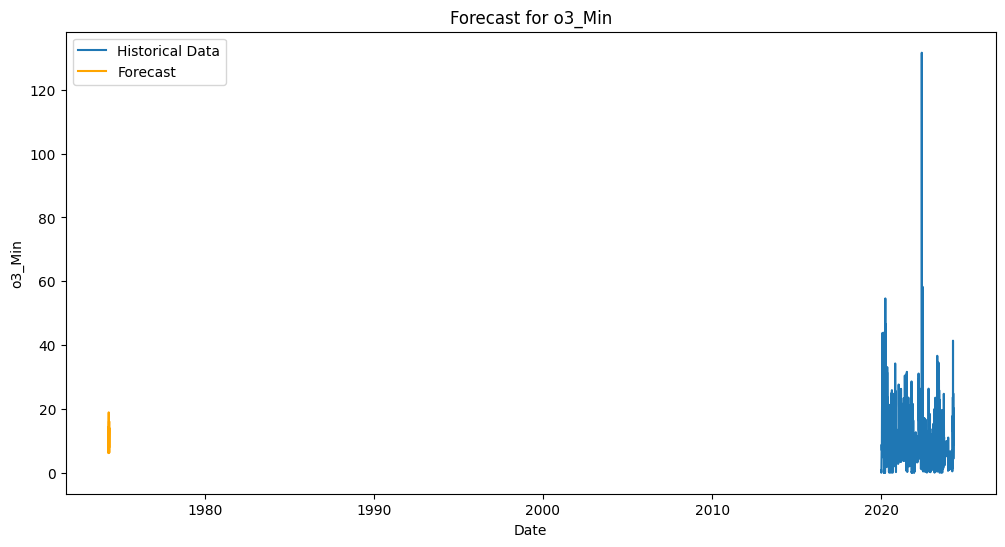

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



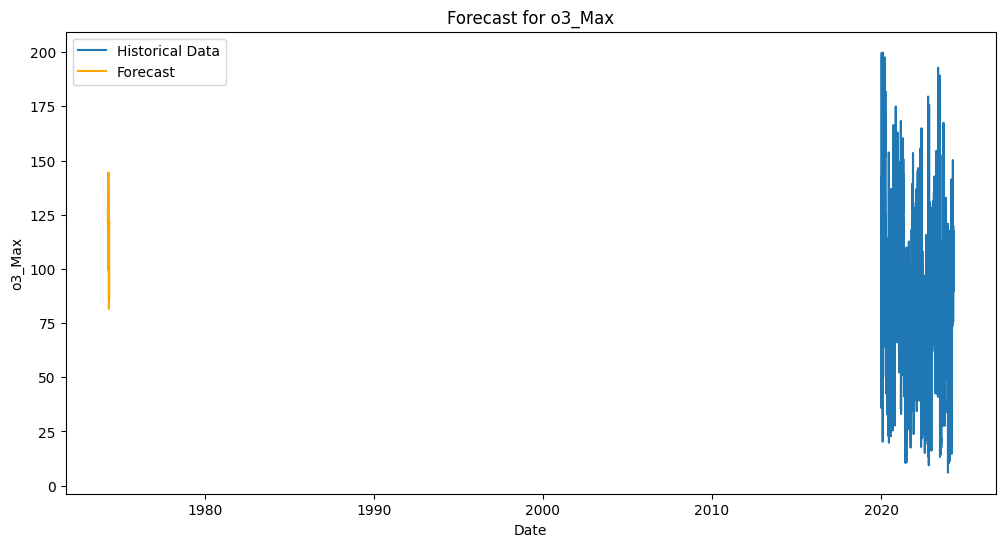

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



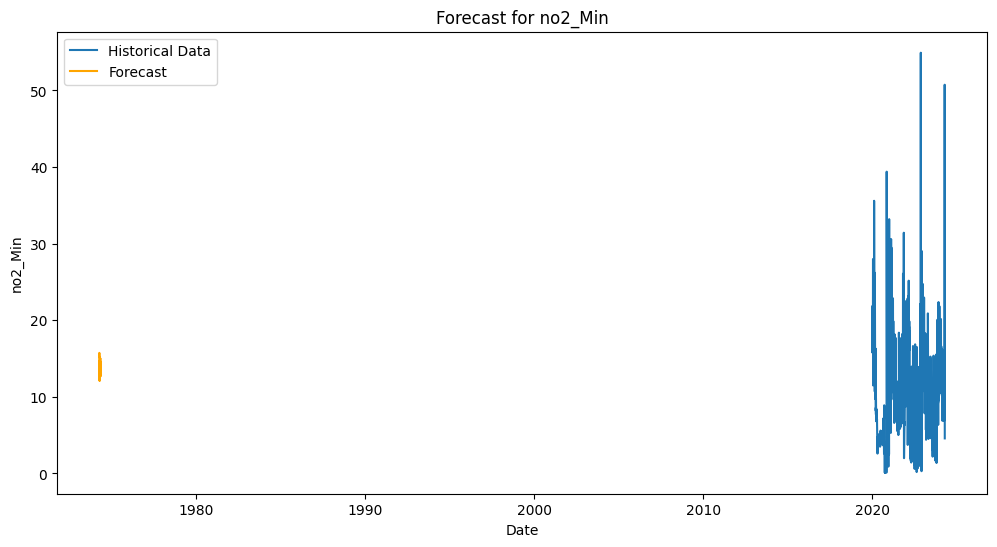

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



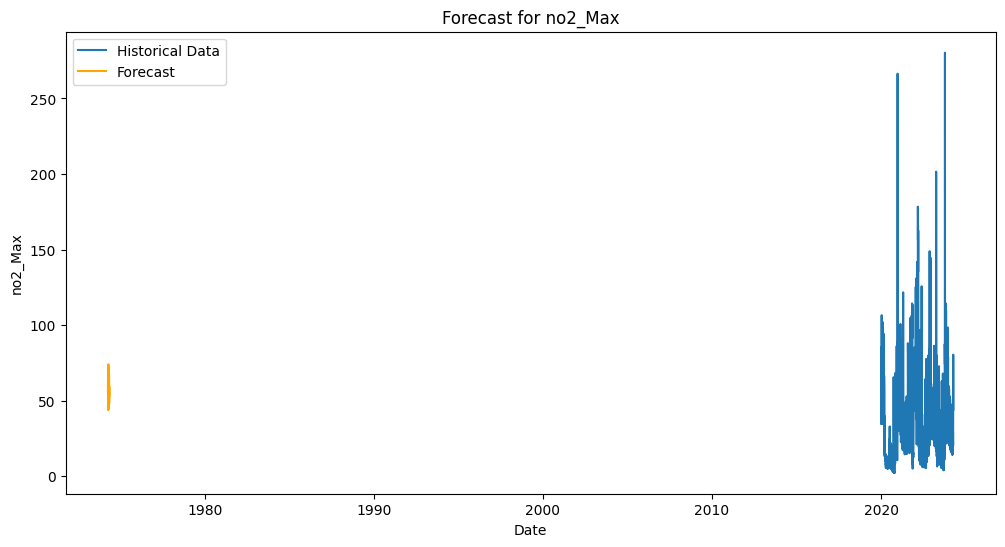

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



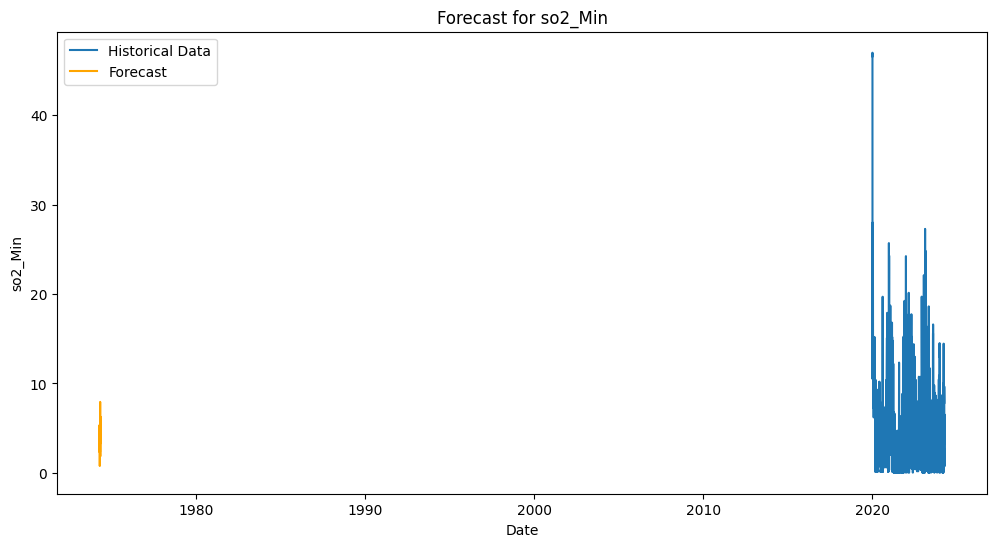

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



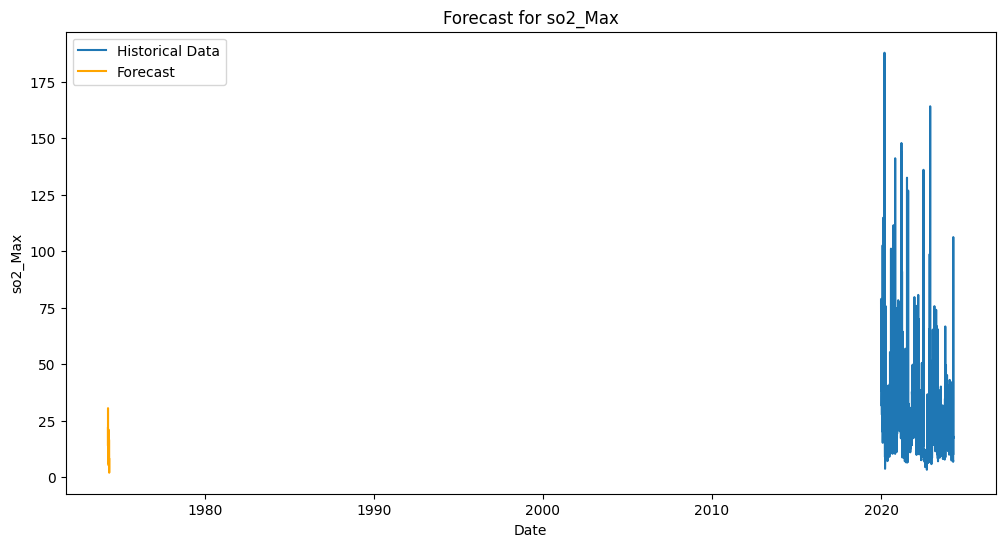

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



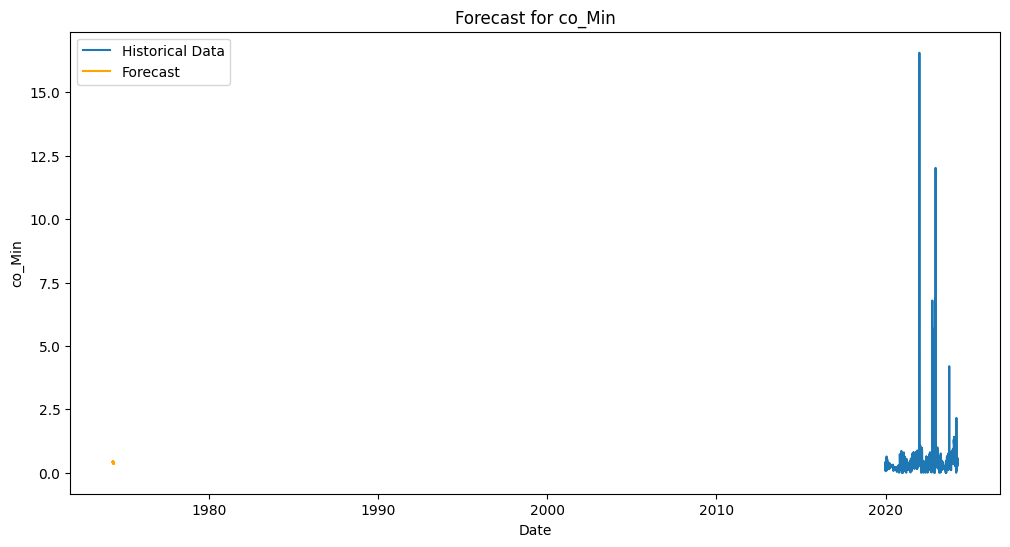

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



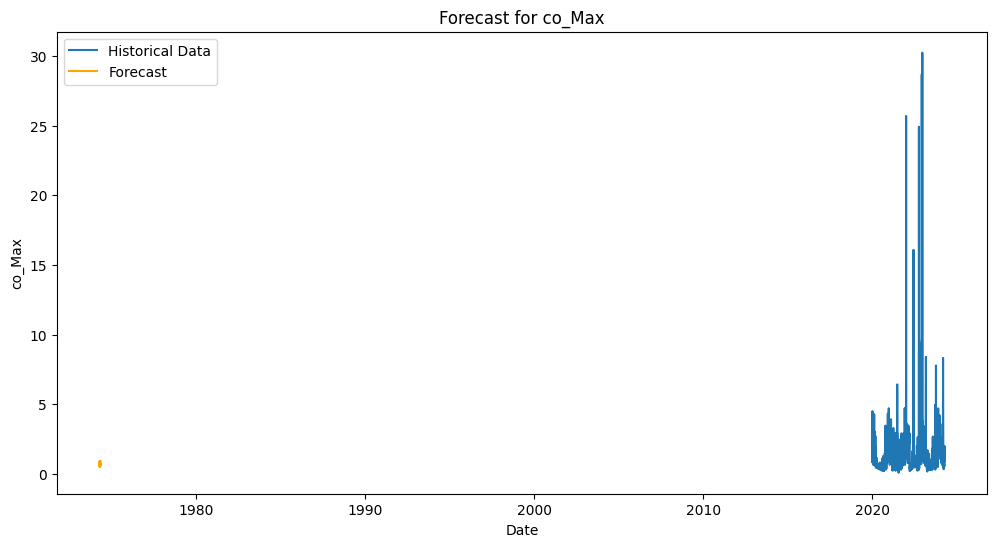

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



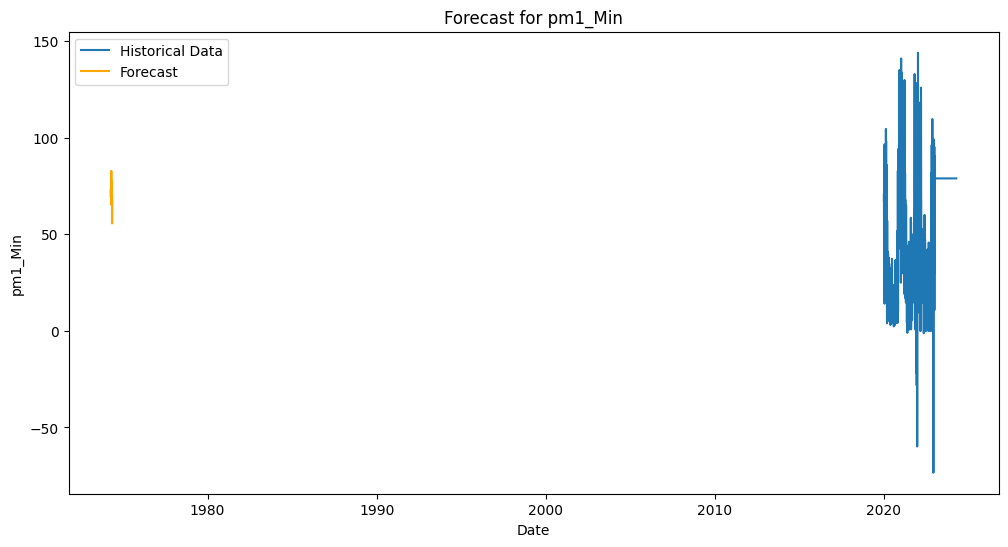

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



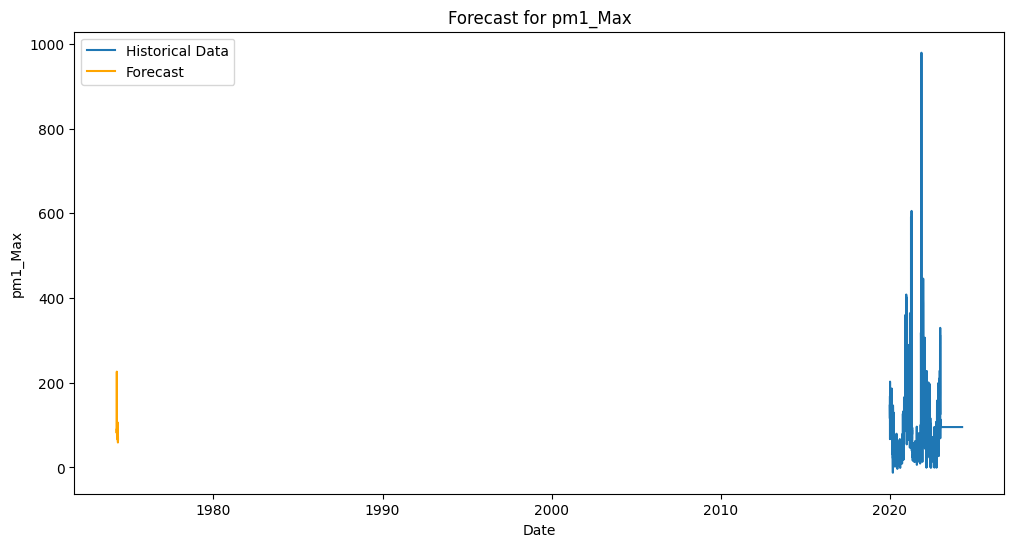

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



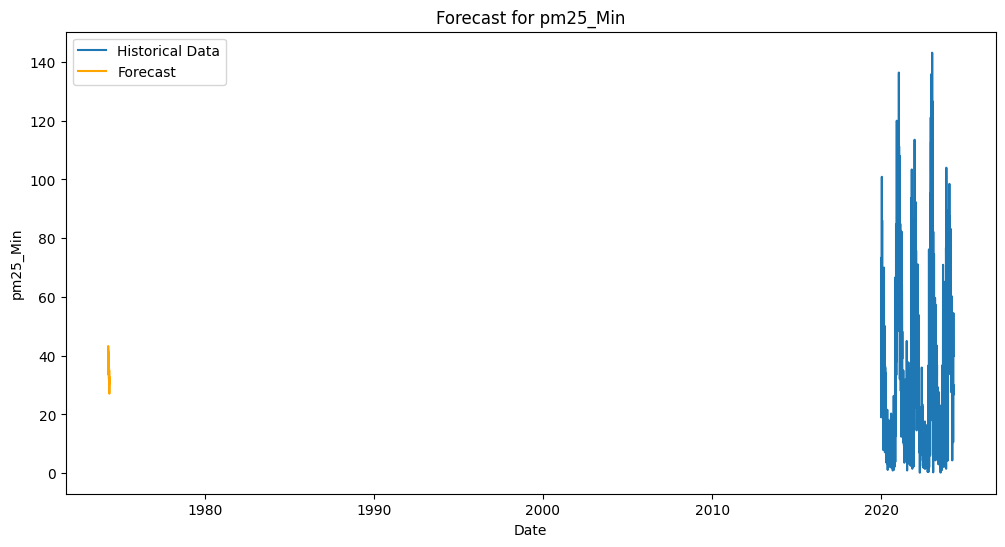

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



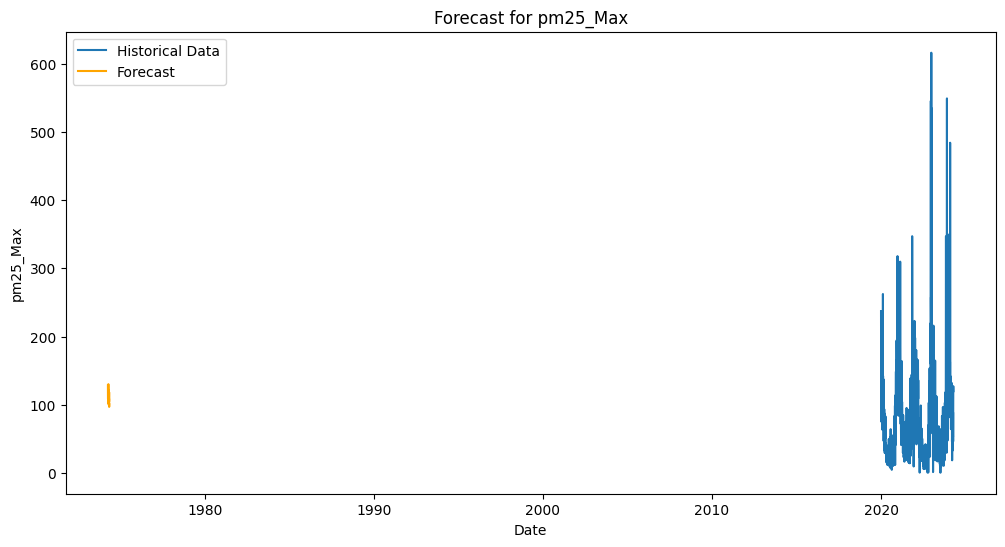

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



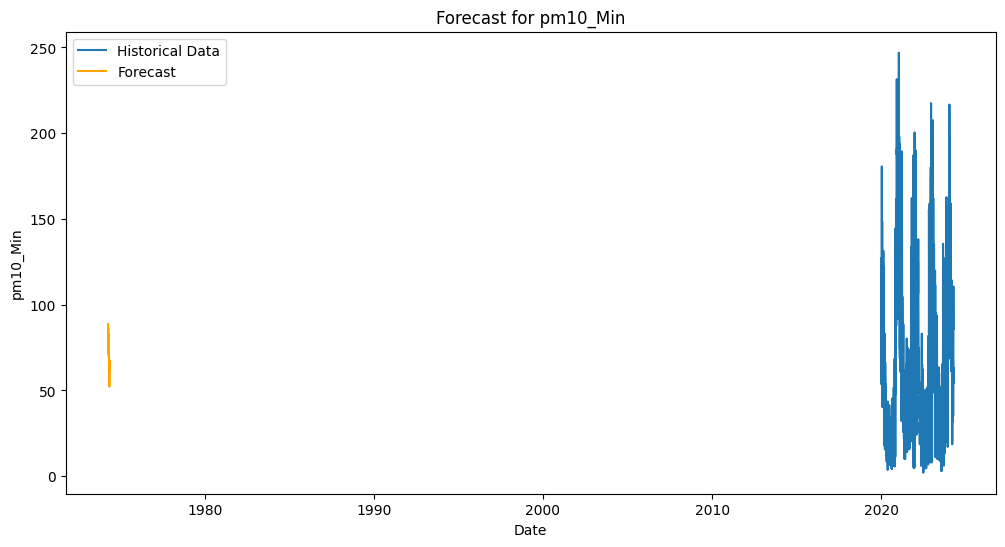

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



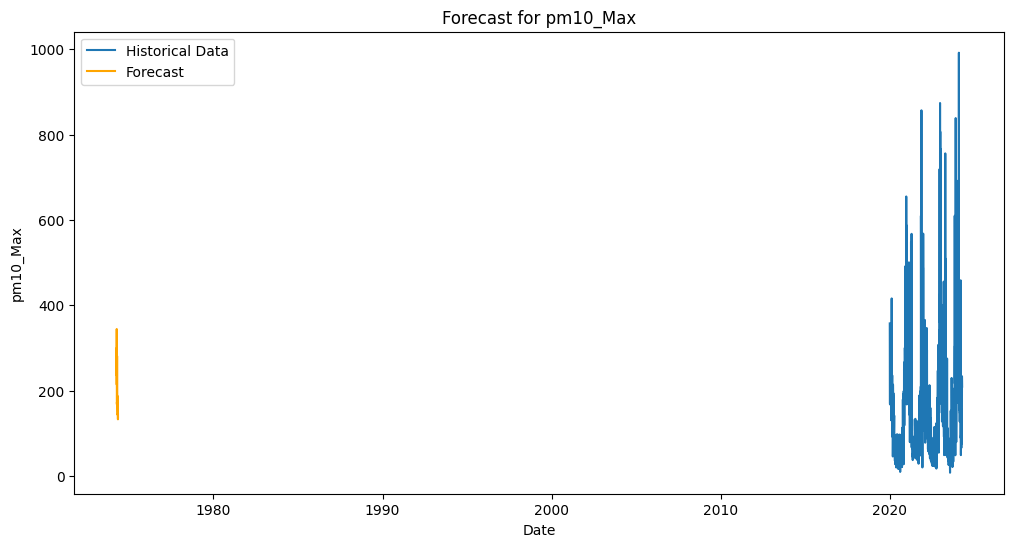

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



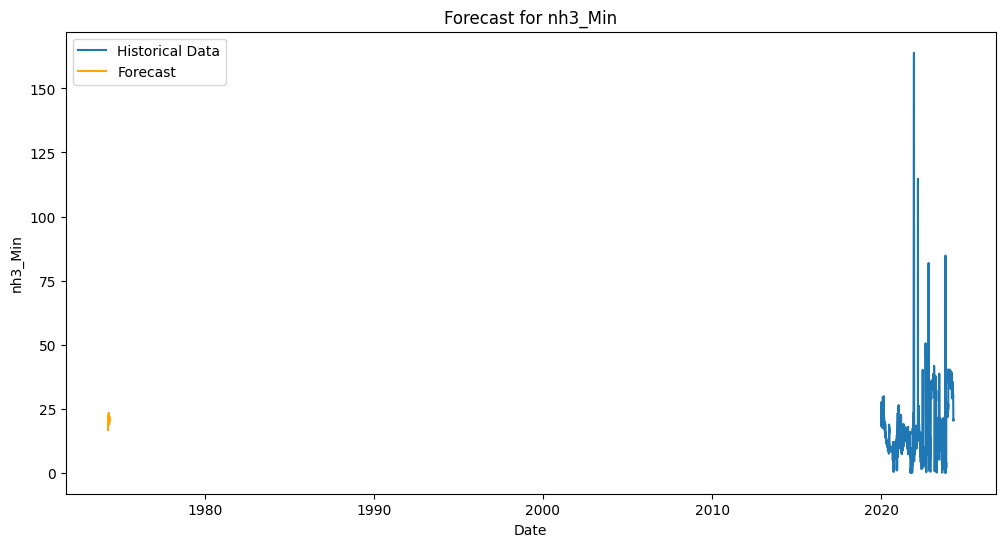

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/home/aee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



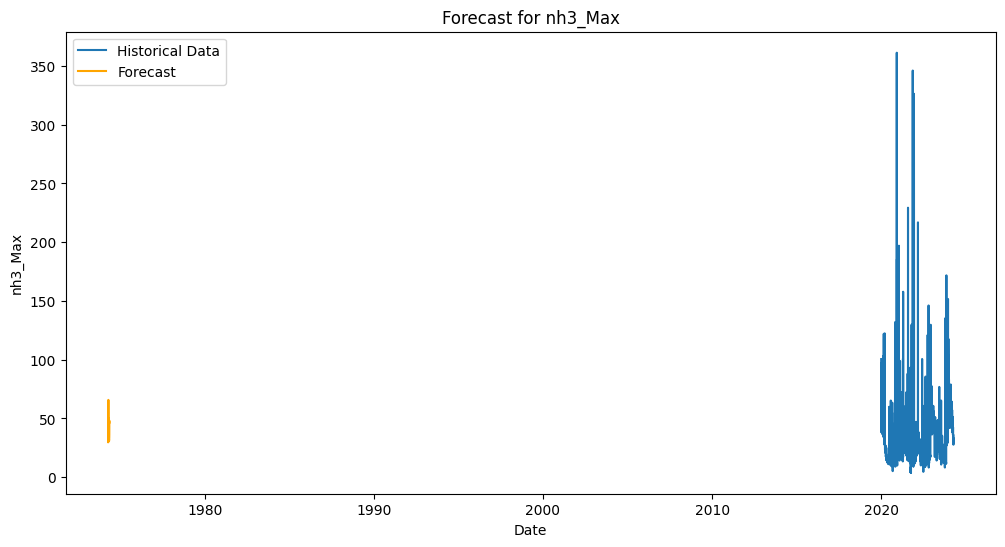

In [61]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd
import matplotlib.pyplot as plt

# Function to load and preprocess data
def load_and_preprocess_data(file_path):
    data = pd.read_excel(file_path)
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Convert non-numeric values to NaN and interpolate
    columns_to_convert = ['o3_Min', 'o3_Max', 'no2_Min', 'no2_Max', 'so2_Min', 'so2_Max', 'co_Min', 'co_Max', 
                          'pm1_Min', 'pm1_Max', 'pm25_Min', 'pm25_Max', 'pm10_Min', 'pm10_Max', 'nh3_Min', 'nh3_Max']
    for col in columns_to_convert:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    
    data = data.interpolate()
    return data, columns_to_convert

# Function to prepare data for ETS model
def prepare_ets_data(data, column_name):
    df = data[['Date', column_name]].set_index('Date')
    return df

# Function to train and forecast using ETS model
def train_and_forecast_ets(df, periods, seasonal_periods):
    model = ExponentialSmoothing(df, seasonal='add', seasonal_periods=seasonal_periods).fit()
    forecast = model.forecast(periods)
    return forecast

# Function to plot forecast
def plot_forecast(df, forecast, param):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df, label='Historical Data')
    plt.plot(forecast.index, forecast, label='Forecast', color='orange')
    plt.title(f'Forecast for {param}')
    plt.xlabel('Date')
    plt.ylabel(param)
    plt.legend()
    plt.show()

# Function to handle the entire workflow
def forecast_air_quality(file_path, n_days, seasonal_periods):
    # Load and preprocess data
    data, columns_to_convert = load_and_preprocess_data(file_path)
    
    forecasts = {}
    
    # Forecast each parameter
    for param in columns_to_convert:
        df = prepare_ets_data(data, param)
        forecast = train_and_forecast_ets(df, n_days, seasonal_periods)
        forecasts[param] = forecast
        
        # Plot forecast
        plot_forecast(df, forecast, param)
    
    return forecasts

# Example usage
file_path = "Kolkata_AQI_Data.xlsx"
n_days = 30
seasonal_periods = 365  # Adjust based on seasonality (e.g., daily data with yearly seasonality)
forecasts = forecast_air_quality(file_path, n_days, seasonal_periods)



In [1]:


# PM10 SUB INDEX CALCULATION
def calculate_pm10_category(pm10):
    if not isinstance(pm10, str):
        if pm10 <= 50:
            return pm10
        elif 50 < pm10 <= 100:
            return pm10
        elif 100 < pm10 <= 250:
            return 100 + (pm10 - 100) * 100 / 150
        elif 250 < pm10 <= 350:
            return 200 + (pm10 - 250)
        elif 350 < pm10 <= 430:
            return 300 + (pm10 - 350) * (100 / 80)
        elif pm10 > 430:
            return 400 + (pm10 - 430) * (100 / 80)
    else:
        return 0

# PM2.5 SUB INDEX CALCULATION
def calculate_pm25_category(pm25):
    if not isinstance(pm25, str):
        if pm25 <= 30:
            return pm25 * 50 / 30
        elif 30 < pm25 <= 60:
            return 50 + (pm25 - 30) * 50 / 30
        elif 60 < pm25 <= 90:
            return 100 + (pm25 - 60) * 100 / 30
        elif 90 < pm25 <= 120:
            return 200 + (pm25 - 90) * (100 / 30)
        elif 120 < pm25 <= 250:
            return 300 + (pm25 - 120) * (100 / 130)
        elif pm25 > 250:
            return 400 + (pm25 - 250) * (100 / 130)
    else:
        return 0
    
# SO2 SUB INDEX CALCULATION
def calculate_so2_category(so2):
    if not isinstance(so2, str):
        if so2 <= 40:
            return so2 * 50 / 40
        elif 40 < so2 <= 80:
            return 50 + (so2 - 40) * 50 / 40
        elif 80 < so2 <= 380:
            return 100 + (so2 - 80) * 100 / 300
        elif 380 < so2 <= 800:
            return 200 + (so2 - 380) * (100 / 420)
        elif 800 < so2 <= 1600:
            return 300 + (so2 - 800) * (100 / 800)
        elif so2 > 1600:
            return 400 + (so2 - 1600) * (100 / 800)
    else:
        return 0
    
# NO2 SUB INDEX CALCULATION
def calculate_no2_category(no2):
    if not isinstance(no2, str):
        if no2 <= 40:
            return no2 * 50 / 40
        elif 40 < no2 <= 80:
            return 50 + (no2 - 40) * 50 / 40
        elif 80 < no2 <= 180:
            return 100 + (no2 - 80) * 100 / 100
        elif 180 < no2 <= 280:
            return 200 + (no2 - 180) * (100 / 100)
        elif 280 < no2 <= 400:
            return 300 + (no2 - 280) * (100 / 120)
        elif no2 > 400:
            return 400 + (no2 - 400) * (100 / 120)
    else:
        return 0
    
# CO SUB INDEX CALCULATION
def calculate_co_category(co):
    if not isinstance(co, str):
        if co <= 1:
            return co * 50 / 1
        elif 1 < co <= 2:
            return 50 + (co - 1) * 50 / 1
        elif 2 < co <= 10:
            return 100 + (co - 2) * 100 / 8
        elif 10 < co <= 17:
            return 200 + (co - 10) * (100 / 7)
        elif 17 < co <= 34:
            return 300 + (co - 17) * (100 / 17)
        elif co > 34:
            return 400 + (co - 34) * (100 / 17)
    else:
        return 0
# O3 SUB INDEX CALCULATION
def calculate_o3_category(o3):
    if not isinstance(o3, str):
        if o3 <= 50:
            return o3 * 50 / 50
        elif 50 < o3 <= 100:
            return 50 + (o3 - 50) * 50 / 50
        elif 100 < o3 <= 168:
            return 100 + (o3 - 100) * 100 / 68
        elif 168 < o3 <= 208:
            return 200 + (o3 - 168) * (100 / 40)
        elif 208 < o3 <= 748:
            return 300 + (o3 - 208) * (100 / 539)
        elif o3 > 748:
            return 400 + (o3 - 400) * (100 / 539)
    else:
        return 0
    
# NH3 SUB INDEX CALCULATION
def calculate_nh3_category(nh3):
    if not isinstance(nh3, str):
        if nh3 <= 200:
            return nh3 * 50 / 200
        elif 200 < nh3 <= 400:
            return 50 + (nh3 - 200) * 50 / 200
        elif 400 < nh3 <= 800:
            return 100 + (nh3 - 400) * 100 / 400
        elif 800 < nh3 <= 1200:
            return 200 + (nh3 - 800) * (100 / 400)
        elif 1200 < nh3 <= 1800:
            return 300 + (nh3 - 1200) * (100 / 600)
        elif nh3 > 1800:
            return 400 + (nh3 - 1800) * (100 / 600)
    else:
        return 0
    
# AQI CALCULATOR
def aqi_calculator(pm10_result, pm25_result, so2_result,no2_result,co_result,o3_result,nh3_result):
    if(pm10_result>=1):
        aqi = pm10_result
    if(pm25_result>=1):
        aqi = pm25_result if (pm25_result>aqi) else aqi
    if(so2_result>=1):
        aqi = so2_result if (so2_result>aqi) else aqi
    if(no2_result>=1):
        aqi = no2_result if (no2_result>aqi) else aqi
    if(co_result>=1):
        aqi = co_result if (co_result>aqi) else aqi
    if(o3_result>=1):
        aqi = o3_result if (o3_result>aqi) else aqi
    if(nh3_result>=1):
        aqi = nh3_result if (nh3_result>aqi) else aqi
             
    return(aqi)
        

pm10_value = 121
pm10_result = calculate_pm10_category(pm10_value)
print(pm10_result)
pm25_value = 34
pm25_result = calculate_pm25_category(pm25_value)
print(pm25_result)
so2_value = 0
so2_result = calculate_so2_category(so2_value)
print(so2_result)
no2_value = 8
no2_result = calculate_no2_category(no2_value)
print(no2_result)
co_value = 0
co_result = calculate_co_category(co_value)
print(co_result)
o3_value = 57
o3_result = calculate_o3_category(o3_value)
print(o3_result)
nh3_value = 34
nh3_result = calculate_nh3_category(nh3_value)
print(nh3_result)


a = aqi_calculator(pm10_result, pm25_result, so2_result,no2_result,co_result,o3_result,nh3_result)
print(a)


114.0
56.666666666666664
0.0
10.0
0.0
57.0
8.5
114.0


##### Calculate The AQI Value of Dataset

In [37]:
import pandas as pd
import numpy as np

# AQI Calculation Functions for Each Pollutant
def calculate_pm10_category(pm10):
    if pm10 <= 50:
        return pm10
    elif pm10 <= 100:
        return pm10
    elif pm10 <= 250:
        return 100 + (pm10 - 100) * 100 / 150
    elif pm10 <= 350:
        return 200 + (pm10 - 250)
    elif pm10 <= 430:
        return 300 + (pm10 - 350) * (100 / 80)
    else:
        return 400 + (pm10 - 430) * (100 / 80)

def calculate_pm25_category(pm25):
    if pm25 <= 30:
        return pm25 * 50 / 30
    elif pm25 <= 60:
        return 50 + (pm25 - 30) * 50 / 30
    elif pm25 <= 90:
        return 100 + (pm25 - 60) * 100 / 30
    elif pm25 <= 120:
        return 200 + (pm25 - 90) * (100 / 30)
    elif pm25 <= 250:
        return 300 + (pm25 - 120) * (100 / 130)
    else:
        return 400 + (pm25 - 250) * (100 / 130)

def calculate_so2_category(so2):
    if so2 <= 40:
        return so2 * 50 / 40
    elif so2 <= 80:
        return 50 + (so2 - 40) * 50 / 40
    elif so2 <= 380:
        return 100 + (so2 - 80) * 100 / 300
    elif so2 <= 800:
        return 200 + (so2 - 380) * (100 / 420)
    elif so2 <= 1600:
        return 300 + (so2 - 800) * (100 / 800)
    else:
        return 400 + (so2 - 1600) * (100 / 800)

def calculate_no2_category(no2):
    if no2 <= 40:
        return no2 * 50 / 40
    elif no2 <= 80:
        return 50 + (no2 - 40) * 50 / 40
    elif no2 <= 180:
        return 100 + (no2 - 80) * 100 / 100
    elif no2 <= 280:
        return 200 + (no2 - 180) * (100 / 100)
    elif no2 <= 400:
        return 300 + (no2 - 280) * (100 / 120)
    else:
        return 400 + (no2 - 400) * (100 / 120)

def calculate_co_category(co):
    if co <= 1:
        return co * 50 / 1
    elif co <= 2:
        return 50 + (co - 1) * 50 / 1
    elif co <= 10:
        return 100 + (co - 2) * 100 / 8
    elif co <= 17:
        return 200 + (co - 10) * (100 / 7)
    elif co <= 34:
        return 300 + (co - 17) * (100 / 17)
    else:
        return 400 + (co - 34) * (100 / 17)

def calculate_o3_category(o3):
    if o3 <= 50:
        return o3 * 50 / 50
    elif o3 <= 100:
        return 50 + (o3 - 50) * 50 / 50
    elif o3 <= 168:
        return 100 + (o3 - 100) * 100 / 68
    elif o3 <= 208:
        return 200 + (o3 - 168) * (100 / 40)
    elif o3 <= 748:
        return 300 + (o3 - 208) * (100 / 539)
    else:
        return 400 + (o3 - 400) * (100 / 539)

def calculate_nh3_category(nh3):
    if nh3 <= 200:
        return nh3 * 50 / 200
    elif nh3 <= 400:
        return 50 + (nh3 - 200) * 50 / 200
    elif nh3 <= 800:
        return 100 + (nh3 - 400) * 100 / 400
    elif nh3 <= 1200:
        return 200 + (nh3 - 800) * (100 / 400)
    elif nh3 <= 1800:
        return 300 + (nh3 - 1200) * (100 / 600)
    else:
        return 400 + (nh3 - 1800) * (100 / 600)

# General AQI Calculation Based on Maximum Sub-index
def aqi_calculator(values):
    return max(values)

# Function to process and calculate AQI for each day
def calculate_aqi_for_data(df):
    min_aqi_values, max_aqi_values, avg_min_aqi_values = [], [], []

    for _, row in df.iterrows():
        # Min, Max, and Average Sub-index Calculations
        pollutants = ['pm10', 'pm25', 'so2', 'no2', 'co', 'o3', 'nh3']

        min_values = [globals()[f'calculate_{p}_category'](row[f'{p}_Min']) for p in pollutants]
        max_values = [globals()[f'calculate_{p}_category'](row[f'{p}_Max']) for p in pollutants]
        avg_min_values = [globals()[f'calculate_{p}_category'](row[f'{p}_Avg']) for p in pollutants]
       

        # Calculate AQI for each case
        min_aqi_values.append(aqi_calculator(min_values))
        max_aqi_values.append(aqi_calculator(max_values))
        avg_min_aqi_values.append(aqi_calculator(avg_min_values))


    # Create new DataFrame
    result_df = pd.DataFrame({
        'Date': df['Date'],
        'Minimum AQI': min_aqi_values,
        'Maximum AQI': max_aqi_values,
        'Average Minimum AQI': avg_min_aqi_values
    })

    return result_df

# Load data and calculate AQI
file_path = "Kolkata_AQI_Data.xlsx"
df = pd.read_excel(file_path)
df['Date'] = pd.to_datetime(df['Date'])

# Convert relevant columns to numeric
pollutant_columns = ['pm10_Min', 'pm10_Max', 'pm25_Min', 'pm25_Max', 'so2_Min', 'so2_Max', 
                     'no2_Min', 'no2_Max', 'co_Min', 'co_Max', 'o3_Min', 'o3_Max', 
                     'nh3_Min', 'nh3_Max']

for col in pollutant_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Print column names to verify
print("Columns in DataFrame:", df.columns)

# Calculate AQI values for min, max, avg min, and avg max
aqi_result_df = calculate_aqi_for_data(df)

# Display results
print(aqi_result_df)

aqi_result_df.to_excel('Aqi_Result.xlsx', index=True)


Columns in DataFrame: Index(['Date', 'Unnamed: 1', 'Time', 'o3_Min', 'o3_Max', 'o3_Avg', 'no2_Min',
       'no2_Max', 'no2_Avg', 'so2_Min', 'so2_Max', 'so2_Avg', 'co_Min',
       'co_Max', 'co_Avg', 'pm1_Min', 'pm1_Max', 'pm1_Avg', 'pm25_Min',
       'pm25_Max', 'pm25_Avg', 'pm10_Min', 'pm10_Max', 'pm10_Avg', 'nh3_Min',
       'nh3_Max', 'nh3_Avg'],
      dtype='object')
           Date  Minimum AQI  Maximum AQI  Average Minimum AQI
0    2020-01-01   110.333333   390.307692           283.333333
1    2020-01-02   128.000000   302.307692           210.000000
2    2020-01-03    53.600000   227.666667            99.000000
3    2020-01-04    53.700000   153.000000            85.000000
4    2020-01-05   102.666667   317.769231           196.666667
...         ...          ...          ...                  ...
1557 2024-04-08    57.600000   122.900000            77.000000
1558 2024-04-09    53.830000   289.933333            87.000000
1559 2024-04-10   107.080000   305.607692           143.333

##### Next n-days AQI Forcast using Prophet

13:39:35 - cmdstanpy - INFO - Chain [1] start processing
13:39:35 - cmdstanpy - INFO - Chain [1] done processing


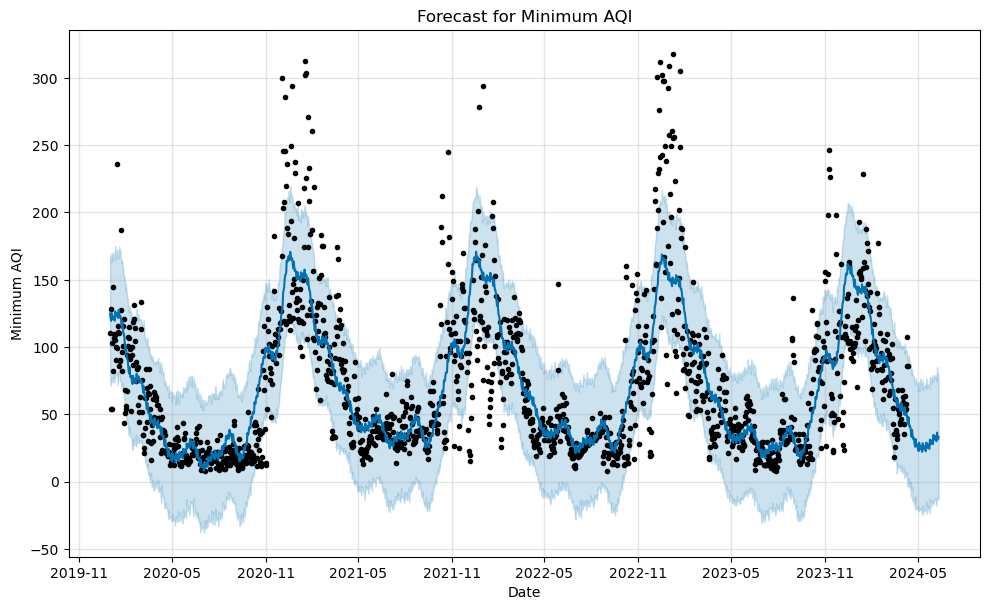

13:39:35 - cmdstanpy - INFO - Chain [1] start processing




Prediction of Minimum AQI is 
       yhat_lower  yhat_upper       yhat
1617  -15.291321   74.527698  30.019488
1618  -11.546272   85.054748  36.360479
1619  -11.622896   81.076873  33.169181
1620  -13.550178   80.672741  31.546200
1621  -13.102351   75.283882  33.084057
<class 'pandas.core.frame.DataFrame'>
value is [[-15.29132091  74.52769829  30.0194885 ]
 [-11.54627217  85.05474789  36.36047875]
 [-11.62289611  81.07687319  33.16918117]
 [-13.55017825  80.67274096  31.54619995]
 [-13.10235059  75.28388226  33.08405668]]


13:39:36 - cmdstanpy - INFO - Chain [1] done processing


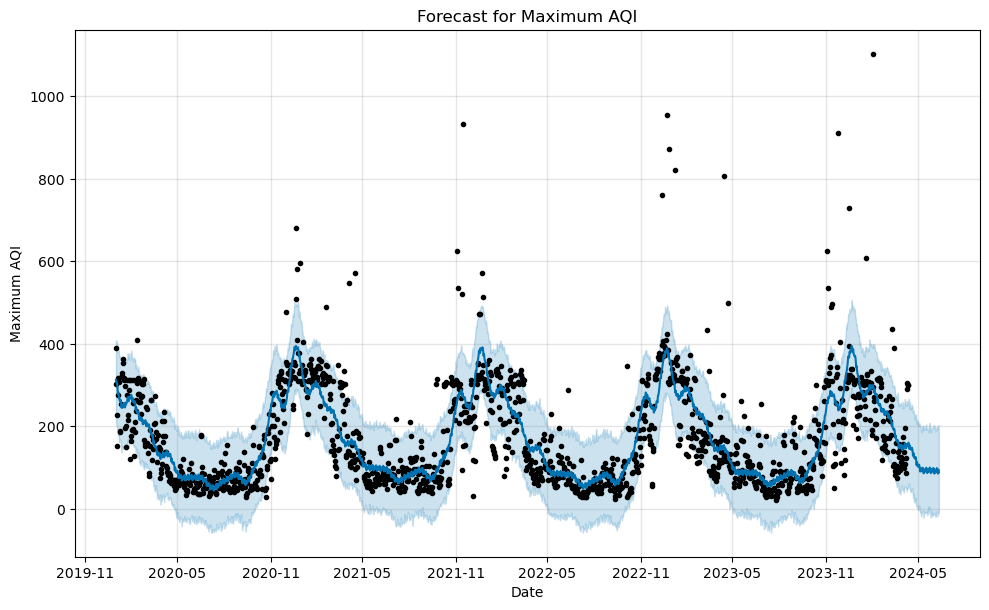

13:39:36 - cmdstanpy - INFO - Chain [1] start processing




Prediction of Maximum AQI is 
       yhat_lower  yhat_upper       yhat
1617   -5.962512  199.393439  98.555953
1618   -7.429218  196.686404  95.733341
1619  -16.907219  191.353599  85.274023
1620   -8.188872  203.233711  95.018210
1621   -9.612966  185.612702  88.209694
<class 'pandas.core.frame.DataFrame'>
value is [[ -5.96251181 199.39343867  98.55595289]
 [ -7.4292184  196.68640434  95.73334133]
 [-16.90721883 191.35359906  85.27402343]
 [ -8.18887242 203.23371082  95.01820993]
 [ -9.61296591 185.61270157  88.20969355]]


13:39:36 - cmdstanpy - INFO - Chain [1] done processing


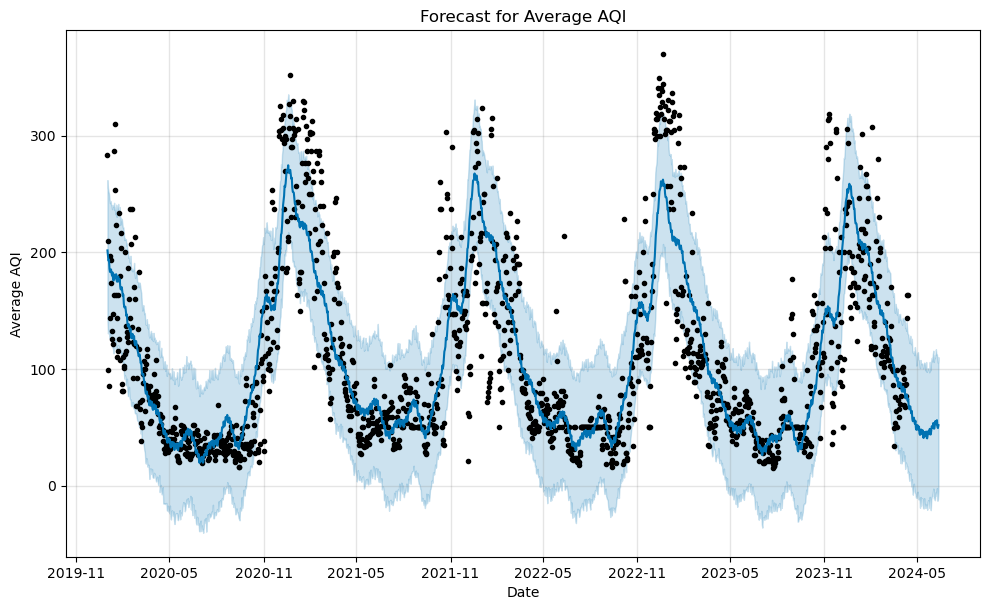



Prediction of Average AQI is 
       yhat_lower  yhat_upper       yhat
1617   -8.584317  112.430592  52.585090
1618   -2.130792  112.553400  56.059093
1619  -13.002573  108.328505  50.319163
1620  -11.806286  105.214988  49.311856
1621   -4.787770  110.059373  51.761604
<class 'pandas.core.frame.DataFrame'>
value is [[ -8.5843169  112.4305916   52.58509038]
 [ -2.13079248 112.55339973  56.05909345]
 [-13.00257331 108.32850505  50.31916267]
 [-11.80628576 105.2149884   49.31185647]
 [ -4.78776951 110.05937274  51.7616036 ]]


In [38]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Function to load and preprocess data
def load_and_preprocess_data(file_path):
    data = pd.read_excel(file_path)
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Convert non-numeric values to NaN and interpolate
    columns_to_convert = ['Minimum AQI', 'Maximum AQI', 'Average AQI']
    for col in columns_to_convert:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    
    data = data.interpolate()
    return data, columns_to_convert

# Function to scale data
def scale_data(data, columns):
    scaler = MinMaxScaler()
    scaled_data = data.copy()
    scaled_data[columns] = scaler.fit_transform(data[columns])
    return scaled_data, scaler

# Function to prepare data for Prophet
def prepare_prophet_df(data, column_name):
    df = data[['Date', column_name]].rename(columns={'Date': 'ds', column_name: 'y'})
    return df

# Function to train Prophet model
def train_prophet_model(df):
    model = Prophet()
    model.fit(df)
    return model

# Function to forecast future values
def forecast_future(model, periods):
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    return forecast

# Function to plot forecast
def plot_forecast(model, forecast, param):
    fig = model.plot(forecast)
    plt.title(f'Forecast for {param}')
    plt.xlabel('Date')
    plt.ylabel(param)
    plt.show()

# Function to handle the entire workflow
def forecast_air_quality(file_path, n_days):
    # Load and preprocess data
    data, columns_to_convert = load_and_preprocess_data(file_path)
    
    # Scale data
    # scaled_data, scaler = scale_data(data, columns_to_convert)
    scaled_data = data
    
    # Define parameters
    parameters = columns_to_convert
    forecasts = {}
    
    # Forecast each parameter
    for param in parameters:
        df = prepare_prophet_df(scaled_data, param)
        model = train_prophet_model(df)
        forecast = forecast_future(model, n_days)
        forecasts[param] = forecast
        
        # # Inverse transform the forecast
        # forecast[['yhat', 'yhat_lower', 'yhat_upper']] = scaler.inverse_transform(
        #     forecast[['yhat', 'yhat_lower', 'yhat_upper']].clip(0, 1)  # Clip values to avoid issues with inverse transformation
        # )
        
        # Plot forecast
        plot_forecast(model, forecast, param)
        print(f"\n\nPrediction of {param} is \n {forecast[['yhat_lower', 'yhat_upper', 'yhat']].tail()}")
        print(type(forecast))
        
        value_param = forecast[['yhat_lower', 'yhat_upper', 'yhat']].tail().to_numpy()
        print(f"value is {value_param}")

    return forecasts

# Example usage
file_path = "AQI_Result.xlsx"
n_days = 60
forecasts = forecast_air_quality(file_path, n_days)


##### Compare Predict Data(AQI)

In [39]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Function to load and preprocess data
def load_and_preprocess_data(file_path):
    data = pd.read_excel(file_path)
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Convert non-numeric values to NaN and interpolate
    columns_to_convert = ['Minimum AQI', 'Maximum AQI', 'Average AQI']
    for col in columns_to_convert:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    
    data = data.interpolate()
    return data, columns_to_convert

# Function to scale data
def scale_data(data, columns):
    scaler = MinMaxScaler()
    scaled_data = data.copy()
    scaled_data[columns] = scaler.fit_transform(data[columns])
    return scaled_data, scaler

# Function to prepare data for Prophet
def prepare_prophet_df(data, column_name):
    df = data[['Date', column_name]].rename(columns={'Date': 'ds', column_name: 'y'})
    return df

# Function to train Prophet model
def train_prophet_model(df):
    model = Prophet()
    model.fit(df)
    return model

# Function to forecast future values
def forecast_future(model, periods):
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    return forecast

# Function to plot forecast
def plot_forecast(model, forecast, param):
    fig = model.plot(forecast)
    plt.title(f'Forecast for {param}')
    plt.xlabel('Date')
    plt.ylabel(param)
    plt.show()

# Function to handle the entire workflow
def forecast_air_quality(file_path, n_days):
    # Load and preprocess data
    data, columns_to_convert = load_and_preprocess_data(file_path)
    
    # Split data into training and testing sets
    test_size = 10
    test_data = data.tail(test_size)
    train_data = data.iloc[:-test_size]
    
    # Scale data
    scaled_train_data, scaler = scale_data(train_data, columns_to_convert)
    scaled_test_data = scaler.transform(test_data[columns_to_convert])
    scaled_test_data = pd.DataFrame(scaled_test_data, columns=columns_to_convert)
    scaled_test_data['Date'] = test_data['Date'].reset_index(drop=True)
    
    # Define parameters
    parameters = columns_to_convert
    forecasts = {}
    
    # Dictionary to store NumPy arrays for each parameter
    forecast_arrays = {}
    test_arrays = {}
    
    # Forecast each parameter
    for param in parameters:
        # Prepare training data for Prophet
        df_train = prepare_prophet_df(scaled_train_data, param)
        model = train_prophet_model(df_train)
        
        # Forecast the next n_days
        forecast = forecast_future(model, n_days)
        forecasts[param] = forecast
        
        # Extract forecast values
        forecast_values = forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']].tail(n_days)
        forecast_array = forecast_values[['yhat']].to_numpy().flatten()
        forecast_arrays[param] = forecast_array
        
        # Extract actual values from test data
        actual_values = scaled_test_data[param].to_numpy()
        test_arrays[param] = actual_values
        
        # Calculate error metrics
        mae = mean_absolute_error(actual_values, forecast_array)
        mse = mean_squared_error(actual_values, forecast_array)
        
        print(f"Parameter: {param}")
        print(f"Mean Absolute Error: {mae}")
        print(f"Mean Squared Error: {mse}")
        print("\n")

    return forecast_arrays, test_arrays

# Example usage
file_path = "Aqi_result.xlsx"
n_days = 10
forecast_arrays, test_arrays = forecast_air_quality(file_path, n_days)


13:45:39 - cmdstanpy - INFO - Chain [1] start processing
13:45:39 - cmdstanpy - INFO - Chain [1] done processing
13:45:39 - cmdstanpy - INFO - Chain [1] start processing


Parameter: Minimum AQI
Mean Absolute Error: 0.06967291811961614
Mean Squared Error: 0.00897523408773805




13:45:39 - cmdstanpy - INFO - Chain [1] done processing
13:45:39 - cmdstanpy - INFO - Chain [1] start processing


Parameter: Maximum AQI
Mean Absolute Error: 0.07680528851797049
Mean Squared Error: 0.008902664353092532




13:45:40 - cmdstanpy - INFO - Chain [1] done processing


Parameter: Average AQI
Mean Absolute Error: 0.09460207417867277
Mean Squared Error: 0.019069561825757024


